In [53]:
import numpy as np
import networkx as nx
import pickle
import pandas as pd
import powerlaw
import scipy
from scipy.stats import norm
from numpy.linalg import eigh,eigvalsh,inv, norm, matrix_rank, pinv
from random import uniform, randint, shuffle
from pylab import plot,show
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import null_space
from matplotlib.colors import LogNorm
from hodgelaplacians import HodgeLaplacians
from kuramoto import Kuramoto, plot_phase_coherence, plot_activity





def high_order_incidence_matrix(A,n): # A=Adjacency matrix n=incidence order
    G=nx.from_numpy_matrix(A)
    c=list(nx.enumerate_all_cliques(G)) #all cliques in graph G (including faces of higher siplex)
   
    n_simplex=[]
    n_minus_1_simplex=[]
    n_l=0
    n_c=0
    for j in range(len(c)): #print k-cliques or (k-1)-simplex
        if len(c[j])==n+1:   
            n_simplex.append(c[j])
            n_c+=1
        if len(c[j])==n:
            n_minus_1_simplex.append(c[j])
            n_l+=1
    Bn=np.zeros([n_l,n_c])
    for j in range(len(n_simplex)):
        for i in range( len(n_minus_1_simplex)):
            ind=0
            if set(n_minus_1_simplex[i]).issubset(set( n_simplex[j]))==True:
                    for k in range(len(n_minus_1_simplex[i])):
                        if n_minus_1_simplex[i][k]!= n_simplex[j][k]:
                            Bn[i,j]=(-1)**k
                            ind=1
                            break
                    if ind==0:
                        Bn[i,j]=(-1)**(n)
    Bn=Bn.astype('float32') 
    return Bn


def high_order_laplacian_matrix(A,n):
    G=nx.from_numpy_matrix(A)
    c=list(nx.find_cliques(G))
   
    simplices=c
    hn=HodgeLaplacians(simplices)
    L=hn.getHodgeLaplacian(n)
    Ln=L.toarray()
    
    return(Ln)

def betti_number(A,n):
    Ln=high_order_laplacian_matrix(A,n)
    eigLn=eigvalsh(Ln)
    bn=0
    for j in range(len(eigLn)):
        if eigLn[j]<10**(-10):
            bn+=1
    return bn

def betti_number_B(A,n,ismaxdim):
    Bn=high_order_incidence_matrix(A,n)
    Bn_plus_1=high_order_incidence_matrix(A,n+1)
    kerBn= null_space(Bn)
    if ismaxdim==0:
        Bn_plus_1=high_order_incidence_matrix(A,n+1)
        dim_kerBn= len(kerBn[0])
 
        rankBn_plus_1= matrix_rank(Bn_plus_1)
        bn=dim_kerBn- rankBn_plus_1
    else:
        dim_kerBn= len(kerBn[0])
 
       
        bn=dim_kerBn
    return(bn)


def plot_degree_dist(G,x):
    import numpy as np
    from scipy.stats import norm
    import matplotlib.pyplot as plt
    
    
    degrees = [G.degree(n) for n in G.nodes()]
    #print(degrees)
    
   # plt.xscale('log')
    data =degrees

    # Fit a normal distribution to the data:
    mu, std = norm.fit(data)

    # Plot the histogram.
    plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.xlabel('degrees')
    #plt.yscale('log')
    plt.show()
    
    #fit = powerlaw.Fit(degrees,xmin=x  ,discrete=True)
    #fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit pdf')
    #fit.plot_pdf( color= 'b')
    #plt.xlabel('k')
    #plt.ylabel('p(k)')
    #plt.show()
    #print('beta= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

def plot_degree_dist_cauchy(G,x):
    import numpy as np
    from scipy.stats import cauchy
    import matplotlib.pyplot as plt
    
    
    degrees = [G.degree(n) for n in G.nodes()]
    #print(degrees)
    
   # plt.xscale('log')
    data =degrees

    # Fit a normal distribution to the data:
   # Fit a normal distribution to the data:
    mu, std = cauchy.fit(data)

    # Plot the histogram.
    plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = cauchy.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    
    plt.xlabel('degrees')
    plt.show()
    
    #fit = powerlaw.Fit(degrees,xmin=x  ,discrete=True)
    #fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit pdf')
    #fit.plot_pdf( color= 'b')
    #plt.xlabel('k')
    #plt.ylabel('p(k)')
    #plt.show()
    #print('beta= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

def plot_degree_dist_lognorm(G,x):
    import numpy as np
    from scipy.stats import lognorm
    import matplotlib.pyplot as plt
    
    
    degrees = [G.degree(n) for n in G.nodes()]
    #print(degrees)
    
   # plt.xscale('log')
    data =degrees

    # Fit a normal distribution to the data:
   
    mu, std,scale = lognorm.fit(data)

    # Plot the histogram.
    plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = lognorm.pdf(x, mu, std, scale)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: s = %.4f,  loc = %.2f, scale=%.2f" % (mu, std,scale)
    plt.title(title)
    plt.xlabel('degrees')
    plt.show()
    
    #fit = powerlaw.Fit(degrees,xmin=x  ,discrete=True)
    #fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit pdf')
    #fit.plot_pdf( color= 'b')
    #plt.xlabel('k')
    #plt.ylabel('p(k)')
    #plt.show()
    #print('beta= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)
    
def laplacian_distrubution(G,x):
    import numpy as np
    from scipy.stats import norm
    import matplotlib.pyplot as plt
    #L=nx.laplacian_matrix(G)
    L=nx.normalized_laplacian_matrix(G)
    L=L.todense()
    L=np.array(L)
    
    l=eigvalsh(L)
    data =l

    # Fit a normal distribution to the data:
    mu, std = norm.fit(data)

    # Plot the histogram.
    plt.hist(data, bins=25, density=True, alpha=0.6, color='b')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.xlabel('Eigenvalues of Laplacian ')
    plt.ylabel('Number of eigenvalues')
    plt.show()
    
    
   # plt.xscale('log')
    #plt.yscale('log')
    
    #plt.xlim(xmin=0, xmax=20)
    #fit = powerlaw.Fit(np.array(l),xmin=x ,discrete=True)
    
    #fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit pdf')
    #fit.plot_pdf( color= 'b')
    #plt.title('eigenvalue distribution function on the tail')
    #plt.ylabel('p(lambda)')
    #plt.xlabel('lambda')
    #plt.show()
    #print('alfa= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)
    
def laplacian_distrubution_cauchy(G,x):
    import numpy as np
    from scipy.stats import cauchy
    import matplotlib.pyplot as plt
    #L=nx.laplacian_matrix(G)
    L=nx.normalized_laplacian_matrix(G)
    L=L.todense()
    L=np.array(L)
    
    l=eigvalsh(L)
    data =l

    # Fit a normal distribution to the data:
    mu, std = cauchy.fit(data)

    # Plot the histogram.
    plt.hist(data, bins=25, density=True, alpha=0.6, color='b')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = cauchy.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.xlim(left=0,right=2)
    plt.title(title)
    plt.xlabel('Eigenvalues of Laplacian ')
    plt.ylabel('Number of eigenvalues')
    plt.show()
    
    
   # plt.xscale('log')
    #plt.yscale('log')
    
    #plt.xlim(xmin=0, xmax=20)
    #fit = powerlaw.Fit(np.array(l),xmin=x ,discrete=True)
    
    #fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit pdf')
    #fit.plot_pdf( color= 'b')
    #plt.title('eigenvalue distribution function on the tail')
    #plt.ylabel('p(lambda)')
    #plt.xlabel('lambda')
    #plt.show()
    #print('alfa= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma) 

def laplacian_distrubution_lognorm(G,x):
    import numpy as np
    from scipy.stats import lognorm
    import matplotlib.pyplot as plt
    #L=nx.laplacian_matrix(G)
    L=nx.normalized_laplacian_matrix(G)
    L=L.todense()
    L=np.array(L)
    
    l=eigvalsh(L)
    data =l

    # Fit a normal distribution to the data:
    mu, std,scale = lognorm.fit(data)
    #print(lognorm.fit(data))
    # Plot the histogram.
    plt.hist(data, bins=25, density=True, alpha=0.6, color='b')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = lognorm.pdf(x, mu, std, scale)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: s = %.4f,  loc = %.2f, scale=%.2f" % (mu, std,scale)
    plt.title(title)
    plt.xlim(left=0,right=2)
    plt.xlabel('Eigenvalues of Laplacian ')
    plt.ylabel('Number of eigenvalues')
    plt.show()
        
def clustering_distribution(G):
    import numpy as np
    from scipy.stats import norm
    import matplotlib.pyplot as plt
    clustering=nx.clustering(G)
    data=np.array(list(clustering.values()))
     # Fit a normal distribution to the data:
    mu, std = norm.fit(data)

    # Plot the histogram.
    plt.hist(data, bins=25, density=True, alpha=0.6, color='r')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.xlabel('clustering coeficients ')
    plt.ylabel('Number of clustering coeficients')
    plt.show()
    
def clustering_distribution_cauchy(G):
    import numpy as np
    from scipy.stats import cauchy
    import matplotlib.pyplot as plt
    clustering=nx.clustering(G)
    data=np.array(list(clustering.values()))
     # Fit a normal distribution to the data:
    mu, std = cauchy.fit(data)

    # Plot the histogram.
    plt.hist(data, bins=25, density=True, alpha=0.6, color='r')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = cauchy.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)  
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.xlabel('clustering coeficients ')
    plt.ylabel('Number of clustering coeficients')
    plt.show()
    
def clustering_distribution_lognorm(G):
    import numpy as np
    from scipy.stats import lognorm
    import matplotlib.pyplot as plt
    clustering=nx.clustering(G)
    data=np.array(list(clustering.values()))
     # Fit a normal distribution to the data:
    mu, std,scale = lognorm.fit(data)

    # Plot the histogram.
    plt.hist(data, bins=25, density=True, alpha=0.6, color='r')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = lognorm.pdf(x, mu, std, scale)
    plt.plot(x, p, 'k', linewidth=2)  
    title = "Fit results: s = %.2f,  loc = %.2f, scale=%.2f" % (mu, std,scale)
    plt.title(title)
    plt.xlabel('clustering coeficients ')
    plt.ylabel('Number of clustering coeficients')
    plt.show()
    
    
def coarse_graining_step(G):
    L=nx.laplacian_matrix(G)
    L=L.todense()
    L=np.array(L)
    r_0=0.01
    r_0=0.0
    H=r_0+L
    C=np.linalg.pinv(H)
    most_correlated_nodes=[]
    correlated_nodes=[]
    correlations=[]
    for i in range(len(C)):
        for j in range(len(C)):
            if i>j:
                correlated_nodes.append([i,j])
                correlations.append(C[i,j])
                
    correlations=np.array(correlations)          
    x=correlations.argsort()
    correlated_nodes=np.array(correlated_nodes)
    correlated_nodes_sorted= correlated_nodes[x[::-1]]
    
    list_of_used_nodes=[]
    for i in range(len(x)):
        for j in range(2):
            if i==0:
                most_correlated_nodes.append(correlated_nodes_sorted[i].tolist())
                list_of_used_nodes.append(int(correlated_nodes_sorted[i][j]))
               
            if int(correlated_nodes_sorted[i][j]) not in list_of_used_nodes:
                if j==0:
                    if int(correlated_nodes_sorted[i][j+1]) not in list_of_used_nodes:
                        most_correlated_nodes.append(correlated_nodes_sorted[i].tolist())
                        list_of_used_nodes.append(correlated_nodes_sorted[i][j])
                        list_of_used_nodes.append(correlated_nodes_sorted[i][j+1])
                        
                if j==1:
                    if int(correlated_nodes_sorted[i][j-1]) not in list_of_used_nodes:
                        most_correlated_nodes.append(correlated_nodes_sorted[i].tolist())
                        list_of_used_nodes.append(int(correlated_nodes_sorted[i][j]))
                        list_of_used_nodes.append(int(correlated_nodes_sorted[i][j-1]))        
    most_correlated_nodes.remove(most_correlated_nodes[0])    
    #print('\n')
    #print(most_correlated_nodes)
    #print(list_of_used_nodes.sort())
    #print('\n')
    
    print(len(most_correlated_nodes))

    
    for k in range(len(most_correlated_nodes)):
       u=int(most_correlated_nodes[k][0])
       v=int(most_correlated_nodes[k][1])
       G = nx.contracted_nodes(G,u,v)
    print(G.number_of_nodes())
    G=nx.convert_node_labels_to_integers(G)
    return G          






def number_of_simplices(A,k):
    G_0=nx.from_numpy_matrix(A)
    c=list(nx.enumerate_all_cliques(G_0))
    #print(c)
   
    count=0
    ind=0
    for j in range(len(c)): #print k-cliques or (k-1)-simplex
        if len(c[j])==k:   
            #print(c[j])
            ind=1
            count+=1
      
    if ind==0:  
        print('there is no maximal simplex with k=',k )
        print('number of k-1-simplices=',count)
    return count

def list_of_weights(A):
    weights=[1]
    for j in range(len(A)):
        for i in range(len(A)):
            if A[i,j] not in weights and A[i,j]>0:
                weights.append(A[i,j])
    weights=np.array(weights).astype(int)
    return weights

def filtration_adj(A,name):
    weights=list_of_weights(A)
   
    for w in weights:
        print(w)
        A_aux=A
        if w>1:
            for i in range(G_0.number_of_nodes()):
                for  j in range(G_0.number_of_nodes()):
                    if A_aux[i,j]<w:
                        A_aux[i,j]=0
            np.savetxt(f'{name}_adj_filt_{w}.txt',A_aux,fmt='%.2f')

            
def laplacian_renorm(G,number_of_steps):
    for j in range(number_of_steps):
           G=coarse_graining_step(G)
    return G


    
def Average_degree(G):
    degrees = [G.degree(n) for n in G.nodes()]
    mean=np.mean(degrees)
    return mean
def plot_degree_dist_power_law(G,x):
    import numpy as np
    import powerlaw
    import matplotlib.pyplot as plt
    
    degrees = [G.degree(n) for n in G.nodes()]
    l=degrees
 

    # Plot the histogram.
    plt.hist(l, bins=50, density=True, alpha=0.6, color='g')

    plt.xscale('log')
    plt.yscale('log')
    
    plt.xlim(xmin=0)
    fit = powerlaw.Fit(np.array(l),xmin=x,discrete=True)
    
    fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit pdf')
    fit.plot_pdf( color= 'b')
    #plt.title('eigenvalue distribution function on the tail')
    #plt.ylabel('p(lambda)')
    plt.xlabel('k')
    plt.show()
    print('gama= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma) 

def calculate_nu(G0,G1):
    return np.log(Average_degree(G1)/Average_degree(G0))/np.log(2)
def calculate_nu_analitic(b,g):
    from scipy.special import gamma
    sum=0
    for n in range(1,100):
        
        sum+=(gamma(n-1/b)/2**n)*(gamma( (g-2)/b +1 )/gamma( (g-2)/b +1+n ) + gamma((g-2)/b)/gamma((g-2)/b+n))
    nu=(2/np.log(2))*np.log( 2**(1+1/b)*(g-1)*(g-2)/(b*gamma(1-1/b)*(2*g-3))*sum     )-1
    return nu

def plot_degree_dist_power_law2(G,x):
    import numpy as np
    import powerlaw
    import matplotlib.pyplot as plt
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmean=Average_degree(G)
    l=degrees/kmean
 

    # Plot the histogram.
    plt.hist(l, bins=50, density=True, alpha=0.6, color='g')

    plt.xscale('log')
    plt.yscale('log')
    
    plt.xlim(xmin=0)
    fit = powerlaw.Fit(np.array(l),xmin=x,discrete=True)
    
    fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit pdf')
    fit.plot_pdf( color= 'b')
    #plt.title('eigenvalue distribution function on the tail')
    #plt.ylabel('p(lambda)')
    plt.xlabel('k/<k>')
    plt.show()
    print('gama= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

def plot_all_dist(G):
    import seaborn as sns
    degrees = [G.degree(n) for n in G.nodes()]
    kmean=Average_degree(G)
    l=degrees/kmean
    heights,bins=np.histogram(l,bins=100)
    pk=heights/np.sum(heights)
    x=np.linspace(0, np.amax(l),num=len(heights))
    plt.scatter(x,pk)
    plt.plot(x,pk)
    plt.xscale('log')
    plt.yscale('log')
    
    #plt.title('eigenvalue distribution function on the tail')
    plt.ylabel('p(k/<k>)')
    plt.xlabel('k/<k>')
    
def plot_cdf(G):
    import seaborn as sns
    degrees = [G.degree(n) for n in G.nodes()]
    kmean=Average_degree(G)
    l=degrees/kmean
    heights,bins=np.histogram(l,bins=200)
    pk=heights/np.sum(heights)
    x=np.linspace(0, np.amax(l),num=len(heights))
    cdf=1-np.cumsum(pk)
    plt.scatter(x,cdf)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(bottom=10**(-4),top=1)
    #plt.title('eigenvalue distribution function on the tail')
    plt.xlim(left=10**(-2),right=10**3)
    plt.ylabel('p(k/<k>)')
    plt.xlabel('k/<k>')
    
def clustering_per_kl(G):
    from collections import defaultdict
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmean=Average_degree(G)
    s=[]
    for i in degrees:
        if i not in s:
            s.append(i)
    l=s/kmean
   

    d = defaultdict(list)
    K=0
    for u in G.nodes():
       d[G.degree(u)].append(u)
    cpd=[]
    for degree in d:
        K+=1
        clustering_coeff = nx.clustering(G, d[degree])
        
        cpd.append(sum(clustering_coeff.values())/len(clustering_coeff))
    plt.scatter(l,cpd)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel('c(k/<k>)')
    plt.xlabel('k/<k>')
    plt.ylim(bottom=10**(-1),top=1)
    
    plt.xlim(left=10**(-2),right=10**2)
def plot_nu_regression(G0,G1,G2,G3,G4,G5):
    from sklearn.linear_model import LinearRegression
    kmean=[Average_degree(G0),Average_degree(G1),Average_degree(G2),Average_degree(G3),Average_degree(G4),Average_degree(G5)]
    l=np.arange(6)
    plt.scatter(l,np.log(kmean))
    regressor = LinearRegression() 
    regressor.fit(np.array(l).reshape((-1,1)),np.array(np.log(kmean)) )
    ypred=regressor.predict(np.array(l).reshape((-1,1)) )
    plt.plot(l,ypred)
    plt.ylabel('log(<k>)')
    plt.xlabel('layers')
    print('coef linear=',regressor.intercept_)
    print('coef angular=',regressor.coef_)
def plot_nu_regression2(G0,G1,G2):
    from sklearn.linear_model import LinearRegression
    kmean=[Average_degree(G0),Average_degree(G1),Average_degree(G2)]
    l=np.arange(3)
    plt.scatter(l,np.log(kmean))
    regressor = LinearRegression() 
    regressor.fit(np.array(l).reshape((-1,1)),np.array(np.log(kmean)) )
    ypred=regressor.predict(np.array(l).reshape((-1,1)) )
    plt.plot(l,ypred)
    plt.ylabel('log(<k>)')
    plt.xlabel('layers')
    plt.show()
    print('coef linear=',regressor.intercept_)
    print('coef angular=',regressor.coef_)
def plot_opxt(G):
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=1.6)

    # Instantiate a random graph and transform into an adjacency matrix
    
    graph = nx.to_numpy_array(G)

    # Instantiate model with parameters
    model = Kuramoto(coupling=3, dt=0.01, T=10, n_nodes=len(graph))

    # Run simulation - output is time series for all nodes (node vs time)
    act_mat = model.run(adj_mat=graph)
    plot_phase_coherence(act_mat)
    
def plot_opxk(G):
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=1.6)

    # Instantiate a random graph and transform into an adjacency matrix
    
    graph = nx.to_numpy_array(G)
    n_nodes=len(graph)

    coupling_vals = np.linspace(0, 0.6, 10)
    runs = []
    for coupling in coupling_vals:
        model = Kuramoto(coupling=coupling, dt=0.1, T=500, n_nodes=len(graph))
        model.natfreqs = np.random.normal(1, 0.1, size=n_nodes)  # reset natural frequencies
        act_mat = model.run(adj_mat=graph)
        runs.append(act_mat)

    # Check that natural frequencies are correct (we need them for prediction of Kc)
    plt.figure()
    plt.hist(model.natfreqs)
    plt.xlabel('natural frequency')
    plt.ylabel('count')
    
    runs_array = np.array(runs)
    
    plt.figure()
    for i, coupling in enumerate(len(coupling_vals)):
        r_mean = np.mean([model.phase_coherence(vec)
                      for vec in runs_array[i, :, -1000:].T]) # mean over last 1000 steps
        plt.scatter(coupling, r_mean, c='steelblue', s=20, alpha=0.7)

    # Predicted Kc – analytical result (from paper)
    Kc = np.sqrt(8 / np.pi) * np.std(model.natfreqs) # analytical result (from paper)
    plt.vlines(Kc, 0, 1, linestyles='--', color='orange', label='analytical prediction')

    plt.legend()
    plt.grid(linestyle='--', alpha=0.8)
    plt.ylabel('order parameter (R)')
    plt.xlabel('coupling (K)')
    sns.despine()
    
    

def plot_opxk2(G,cor):
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=1.6)

    # Instantiate a random graph and transform into an adjacency matrix
    
    graph = nx.to_numpy_array(G)
    n_nodes=len(graph)

    coupling_vals = np.linspace(0, 0.6, 100)
    runs = []
    for coupling in coupling_vals:
        model = Kuramoto(coupling=coupling, dt=0.1, T=500, n_nodes=len(graph))
        model.natfreqs = np.random.normal(1, 0.1, size=n_nodes)  # reset natural frequencies
        act_mat = model.run(adj_mat=graph)
        runs.append(act_mat)

    # Check that natural frequencies are correct (we need them for prediction of Kc)
  
    
    runs_array = np.array(runs)
    
   
    for i, coupling in enumerate(coupling_vals):
        r_mean = np.mean([model.phase_coherence(vec)
                      for vec in runs_array[i, :, -1000:].T]) # mean over last 1000 steps
        plt.scatter(coupling, r_mean, c=cor, s=20, alpha=0.7)

    # Predicted Kc – analytical result (from paper)
    #Kc = np.sqrt(8 / np.pi) * np.std(model.natfreqs) # analytical result (from paper)
    #plt.vlines(Kc, 0, 1, linestyles='--', color='orange', label='analytical prediction')

    #plt.legend()
    #plt.grid(linestyle='--', alpha=0.8)
    plt.ylabel('order parameter (r)')
    plt.xlabel('coupling (K)')
    sns.despine()
    

def plot_opxk3(G,cor):
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=1.6)

    # Instantiate a random graph and transform into an adjacency matrix
    
    graph = nx.to_numpy_array(G)
    n_nodes=len(graph)

    coupling_vals = np.linspace(0, 1.0, 100)
    runs = []
    for coupling in coupling_vals:
        model = Kuramoto(coupling=coupling, dt=0.1, T=500, n_nodes=len(graph))
        model.natfreqs =  np.random.uniform(-1/2,1/2,n_nodes)  # reset natural frequencies
        act_mat = model.run(adj_mat=graph)
        runs.append(act_mat)

    # Check that natural frequencies are correct (we need them for prediction of Kc)
  
    
    runs_array = np.array(runs)
    
   
    for i, coupling in enumerate(coupling_vals):
        r_mean = np.mean([model.phase_coherence(vec)
                      for vec in runs_array[i, :, -1000:].T]) # mean over last 1000 steps
        plt.scatter(coupling, r_mean, c=cor, s=20, alpha=0.7)
       

    # Predicted Kc – analytical result (from paper)
    #Kc = np.sqrt(8 / np.pi) * np.std(model.natfreqs) # analytical result (from paper)
    #plt.vlines(Kc, 0, 1, linestyles='--', color='orange', label='analytical prediction')

    #plt.legend()
    #plt.grid(linestyle='--', alpha=0.8)
    plt.ylabel('order parameter (R)')
    plt.xlabel('coupling (K)')
    sns.despine()
    
def plot_opxk4(G,cor,nat_freqs,number_of_simulations):
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=1.6)

    # Instantiate a random graph and transform into an adjacency matrix
    
    graph = nx.to_numpy_array(G)
    n_nodes=len(graph)

    coupling_vals = np.linspace(0, 1.0, 100)
    mean_of_simulations=np.zeros(len(coupling_vals))
    for j in range(number_of_simulations):
        r=np.zeros(len(coupling_vals))
        
        runs = []
        
        for coupling in coupling_vals:
            model = Kuramoto(coupling=coupling, dt=0.1, T=500, n_nodes=len(graph))
            model.natfreqs =  nat_freqs  # reset natural frequencies
            act_mat = model.run(adj_mat=graph)
            runs.append(act_mat)

        # Check that natural frequencies are correct (we need them for prediction of Kc)


        runs_array = np.array(runs)


        for i, coupling in enumerate(coupling_vals):
            r_mean = np.mean([model.phase_coherence(vec)
                          for vec in runs_array[i, :, -1000:].T]) # mean over last 1000 steps
            r[i]= r_mean
        mean_of_simulations+=r/number_of_simulations

    # Predicted Kc – analytical result (from paper)
    #Kc = np.sqrt(8 / np.pi) * np.std(model.natfreqs) # analytical result (from paper)
    #plt.vlines(Kc, 0, 1, linestyles='--', color='orange', label='analytical prediction')
    np.savetxt(str(G),r,fmt='%.2f')
    plt.scatter(coupling_vals, r, c=cor, s=20, alpha=0.7)
    #plt.legend()
    #plt.grid(linestyle='--', alpha=0.8)
    plt.ylabel('order parameter (r)')
    plt.xlabel('coupling (K)')
    sns.despine()
    
def laplacian_replica(G,Gr,error):
    degrees = [G.degree(n) for n in G.nodes()]
    kmean=Average_degree(G)
    k=Average_degree(Gr)
    ind=0
    Gaux2=Gr.copy()
    while k>kmean+error or k<kmean-error:
            
            Gaux2=remove_edge_lap(Gaux2)
            
            k=Average_degree(Gaux2)
            print(k)
    return Gaux2

def laplacian_replica2(G,Gr,error):
    L=nx.laplacian_matrix(G)
    L=L.todense()
    L=np.array(L)
    r_0=0.01
    r_0=0.0
    H=r_0+L
    C=np.linalg.pinv(H)
    correlated_nodes=[]
    correlations=[]
    for i in range(len(C)):
        for j in range(len(C)):
            if i>j:
                correlated_nodes.append([i,j])
                correlations.append(C[i,j])
    correlations=np.array(correlations)          
    x=correlations.argsort()
    correlated_nodes=np.array(correlated_nodes)
    correlated_nodes_sorted= correlated_nodes[x]
    degrees = [G.degree(n) for n in G.nodes()]
    kmean=Average_degree(G)
    k=Average_degree(Gr)
    ind=0
    Gaux2=Gr.copy()
    Gaux2=nx.convert_node_labels_to_integers(Gaux2)
    l=0
    while k>kmean+error or k<kmean-error:
                
        u=int(correlated_nodes_sorted[l][0])
        v=int(correlated_nodes_sorted[l][1])
        
        if Gaux2.has_edge(u,v)==True:
            Gaux2.remove_edge(v,u)
            k=Average_degree(Gaux2)
            
            
        l+=1
    return Gaux2




def remove_edge_lap(G):
        
        
        L=nx.laplacian_matrix(G)
        L=L.todense()
        L=np.array(L)
        r_0=0.01
        r_0=0.0
        H=r_0+L
        C=np.linalg.pinv(H)
        minpos = np.where(C == np.amin(C))
        listofcord=list(zip(minpos[0],minpos[1]))
        v=np.array(listofcord[0])
        if nodes_connected(G,v[0],v[1])==True:

            G.remove_edge( v[0],v[1])
            return(G)
        else:
            correlations=[]
            for i in range(len(C)):
                for j in range(len(C)):
                    if i>j:
                        correlations.append(C[i,j])
            correlations.sort()
            print(correlations)
            for j in correlations:
                minpos = np.where(C == j)
                listofcord=list(zip(minpos[0],minpos[1]))
                v=np.array(listofcord[0])
                if nodes_connected(G,v[0],v[1])==True:

                    G.remove_edge( v[0],v[1])
                    break
            return(G)

def nodes_connected(G,u, v):
     return u in G.neighbors(v)
    
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]
    

In [22]:
G2000=nx.barabasi_albert_graph(2000,3,seed=42 )
G4000=nx.barabasi_albert_graph(4000,3,seed=42 )


In [23]:
G20001sl=laplacian_renorm(G2000,1)
G20002sl=laplacian_renorm(G2000,2)
G20003sl=laplacian_renorm(G2000,3)



1000
1000
1000
1000
500
500
1000
1000
500
500
250
250


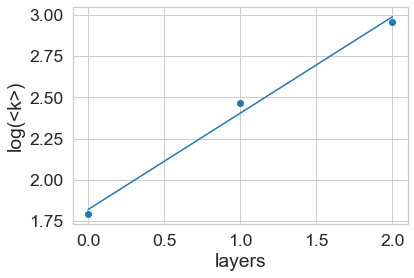

coef linear= 1.8195934390782882
coef angular= [0.58388603]
nu= 0.943666826245471


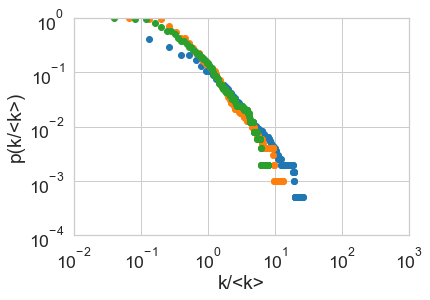

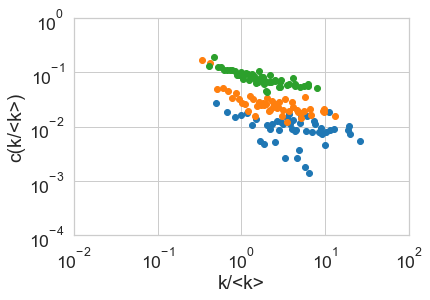

In [46]:
plot_nu_regression2(G2000,G20001sl,G20002sl)
print('nu=',0.6541/np.log(2))
plot_cdf(G2000)
plot_cdf(G20001sl)
plot_cdf(G20002sl)
plt.show()
clustering_per_kl(G2000)
clustering_per_kl(G20001sl)
clustering_per_kl(G20002sl)


In [7]:
print(calculate_nu(G2000,G20001sl))
print(calculate_nu(G20001sl,G20002sl))
print(calculate_nu(G20002sl,G20003sl))

0.9587180059576372
0.9288918713586513
0.8203125719516235


In [18]:
G40001sl=laplacian_renorm(G4000,1)
G40002sl=laplacian_renorm(G4000,2)
G40003sl=laplacian_renorm(G4000,3)

2000
2000
2000
2000
1000
1000
2000
2000
1000
1000
500
500


In [19]:
print(calculate_nu(G4000,G40001sl))
print(calculate_nu(G40001sl,G40002sl))
print(calculate_nu(G40002sl,G40003sl))

0.9736525541711454
0.7353963278464711
0.7490148744730352


In [24]:
A40001sl=nx.adjacency_matrix(G40001sl)

A40001sl = A40001sl.todense()
A40001sl=np.array(A40001sl)

A40002sl=nx.adjacency_matrix(G40002sl)

A40002sl = A40002sl.todense()
A40002sl=np.array(A40002sl)


A40003sl=nx.adjacency_matrix(G40003sl)

A40003sl = A40003sl.todense()
A40003sl=np.array(A40003sl)

In [25]:
A20001sl=nx.adjacency_matrix(G20001sl)

A20001sl = A20001sl.todense()
A20001sl=np.array(A20001sl)

A20002sl=nx.adjacency_matrix(G20002sl)

A20002sl = A20002sl.todense()
A20002sl=np.array(A20002sl)


A20003sl=nx.adjacency_matrix(G20003sl)

A20003sl = A20003sl.todense()
A20003sl=np.array(A20003sl)

In [26]:
np.savetxt('A40001sl.txt',A40001sl,fmt='%.2f')
np.savetxt('A40002sl.txt',A40002sl,fmt='%.2f')
np.savetxt('A40003sl.txt',A40003sl,fmt='%.2f')

In [27]:
np.savetxt('A20001sl.txt',A20001sl,fmt='%.2f')
np.savetxt('A20002sl.txt',A20002sl,fmt='%.2f')
np.savetxt('A20003sl.txt',A20003sl,fmt='%.2f')

In [28]:
nx.write_edgelist(G4000, "barabasi4000_edgelist.txt")
nx.write_edgelist(G2000, "barabasi2000_edgelist.txt")

In [29]:
A2000_0s=np.loadtxt('barabasi2000_edgelist_adj_matrix_0.txt')
A2000_1s=np.loadtxt("barabasi2000_edgelist_adj_matrix_1.txt")
A2000_2s=np.loadtxt("barabasi2000_edgelist_adj_matrix_2.txt")
A2000_3s=np.loadtxt("barabasi2000_edgelist_adj_matrix_3.txt")

A4000_0s=np.loadtxt('barabasi4000_edgelist_adj_matrix_0.txt')
A4000_1s=np.loadtxt("barabasi4000_edgelist_adj_matrix_1.txt")
A4000_2s=np.loadtxt("barabasi4000_edgelist_adj_matrix_2.txt")
A4000_3s=np.loadtxt("barabasi4000_edgelist_adj_matrix_3.txt")




In [31]:
A4000_1sl=np.loadtxt('A40001sl.txt')
A4000_2sl=np.loadtxt('A40002sl.txt')
A4000_3sl=np.loadtxt('A40003sl.txt')


In [32]:
G40001sl=nx.from_numpy_matrix(A4000_1sl)
G40002sl=nx.from_numpy_matrix(A4000_2sl)
G40003sl=nx.from_numpy_matrix(A4000_3sl)

In [33]:
G20001sg=nx.from_numpy_matrix(A2000_1s)
G20002sg=nx.from_numpy_matrix(A2000_2s)
G20003sg=nx.from_numpy_matrix(A2000_3s)

G40001sg=nx.from_numpy_matrix(A4000_1s)
G40002sg=nx.from_numpy_matrix(A4000_2s)
G40003sg=nx.from_numpy_matrix(A4000_3s)


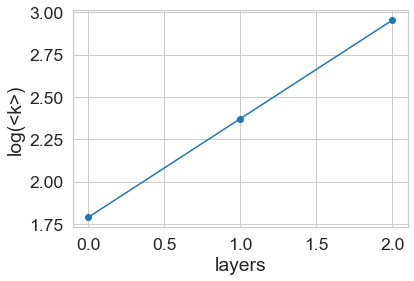

coef linear= 1.7881675674555098
coef angular= [0.58326259]
nu= 0.8413797478464435


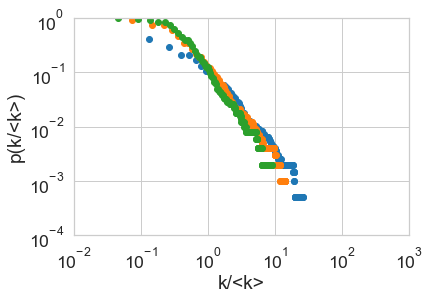

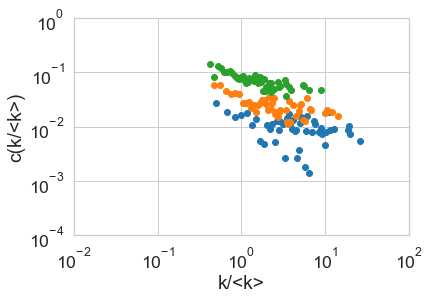

In [47]:
plot_nu_regression2(G2000,G20001sg,G20002sg)
print('nu=',0.5832/np.log(2))
plot_cdf(G2000)
plot_cdf(G20001sg)
plot_cdf(G20002sg)
plt.show()
clustering_per_kl(G2000)
clustering_per_kl(G20001sg)
clustering_per_kl(G20002sg)

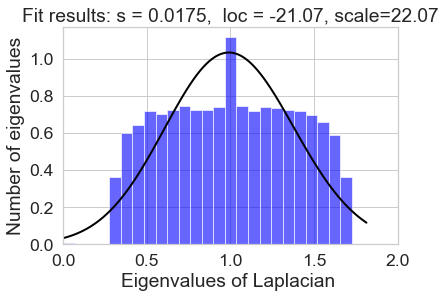

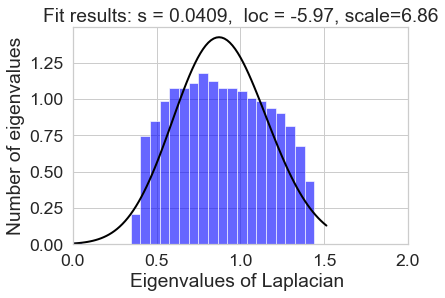

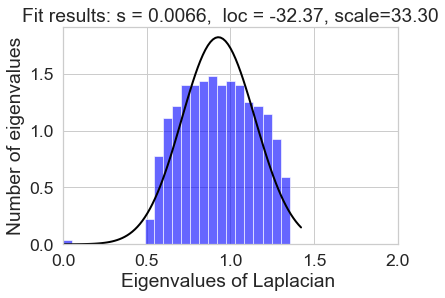

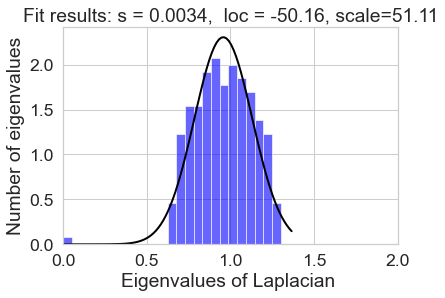

In [35]:
laplacian_distrubution_lognorm(G2000,10)
laplacian_distrubution_lognorm(G20001sl,10)
laplacian_distrubution_lognorm(G20002sl,10)
laplacian_distrubution_lognorm(G20003sl,10)

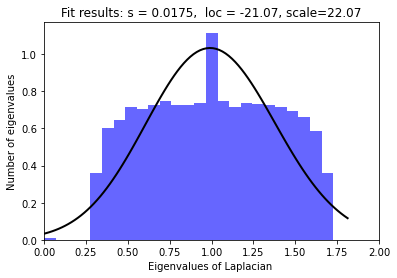

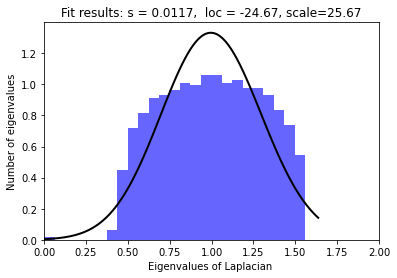

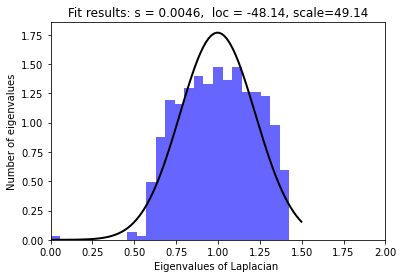

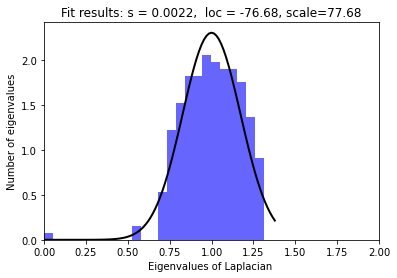

In [12]:
laplacian_distrubution_lognorm(G2000,10)
laplacian_distrubution_lognorm(G20001sg,10)
laplacian_distrubution_lognorm(G20002sg,10)
laplacian_distrubution_lognorm(G20003sg,10)

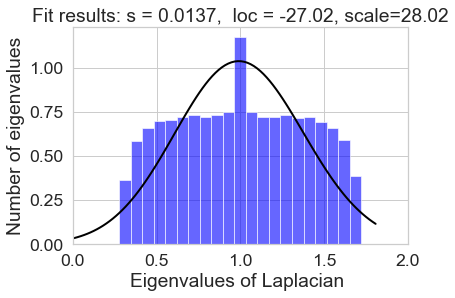

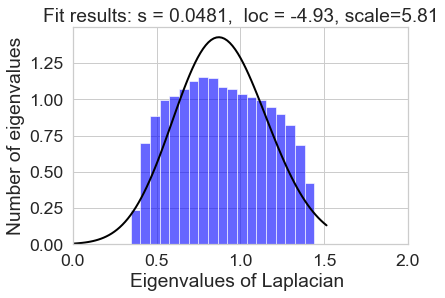

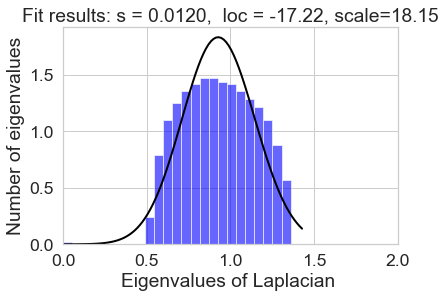

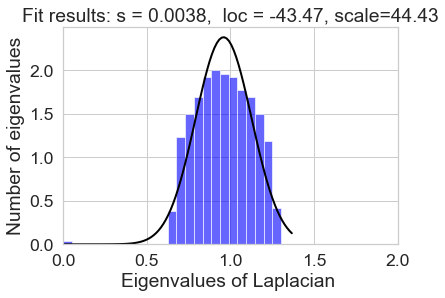

In [37]:
laplacian_distrubution_lognorm(G4000,10)
laplacian_distrubution_lognorm(G40001sl,10)
laplacian_distrubution_lognorm(G40002sl,10)
laplacian_distrubution_lognorm(G40003sl,10)


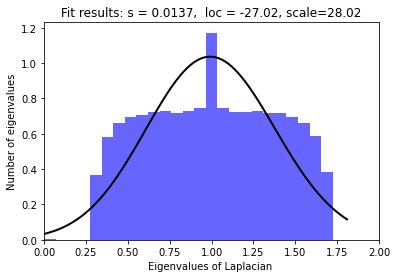

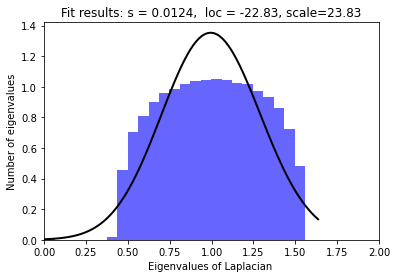

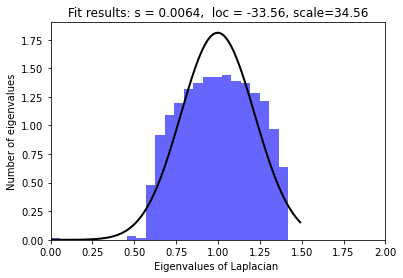

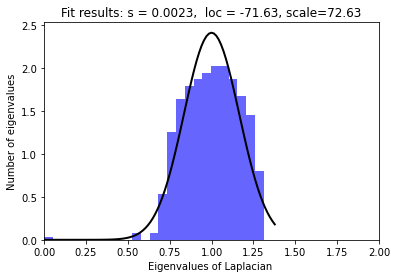

In [32]:
laplacian_distrubution_lognorm(G4000,10)
laplacian_distrubution_lognorm(G40001sg,10)
laplacian_distrubution_lognorm(G40002sg,10)
laplacian_distrubution_lognorm(G40003sg,10)

In [38]:
print(calculate_nu(G4000,G40001sg))
print(calculate_nu(G40001sg,G40002sg))
print(calculate_nu(G40002sg,G40003sg))

0.8699008673725089
0.8720371814687093
0.8509833413734669


In [39]:
print(calculate_nu(G2000,G20001sg))
print(calculate_nu(G20001sg,G20002sg))
print(calculate_nu(G20002sg,G20003sg))

0.8324209913857974
0.8505191013247781
0.7880695174821765


In [20]:
beta4000=1.00683
beta2000=1.0073

print(2/beta2000-1)
print(2/beta4000-1)

0.9855058076044871
0.9864326648987418


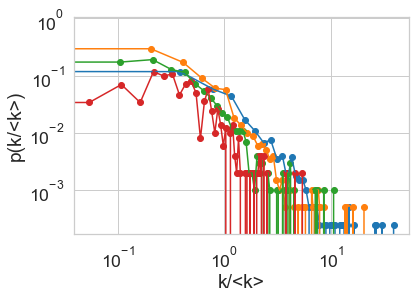

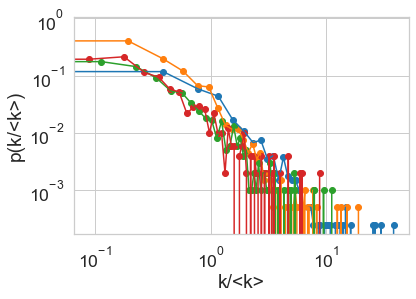

In [40]:
plot_all_dist(G4000)
plot_all_dist(G40001sg)
plot_all_dist(G40002sg)
plot_all_dist(G40003sg)
plt.show()



plot_all_dist(G4000)
plot_all_dist(G40001sl)
plot_all_dist(G40002sl)
plot_all_dist(G40003sl)
plt.show()

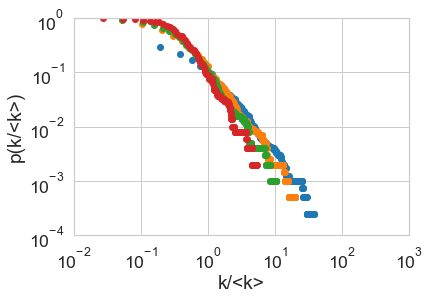

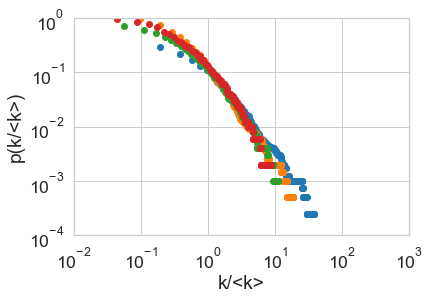

In [41]:
plot_cdf(G4000)
plot_cdf(G40001sg)
plot_cdf(G40002sg)
plot_cdf(G40003sg)
plt.show()



plot_cdf(G4000)
plot_cdf(G40001sl)
plot_cdf(G40002sl)
plot_cdf(G40003sl)
plt.show()

In [ ]:
clustering_per_kl(G4000)
plot_cdf(G40001sg)
plot_cdf(G40002sg)
plot_cdf(G40003sg)
plt.show()



plot_cdf(G4000)
plot_cdf(G40001sl)
plot_cdf(G40002sl)
plot_cdf(G40003sl)
plt.show()

C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_18120/216160569.py:522: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


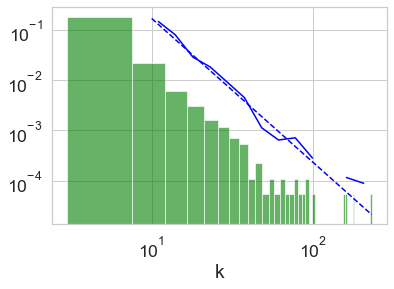

gama=  2.867471854536187   sigma=  0.08882657779016012


C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_18120/216160569.py:522: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


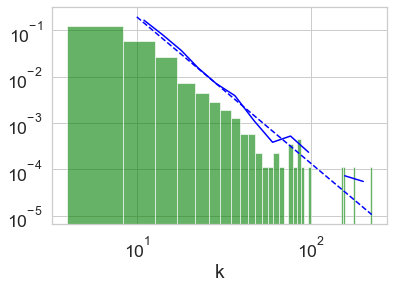

gama=  3.166997166701703   sigma=  0.07944597068906284


C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_18120/216160569.py:522: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


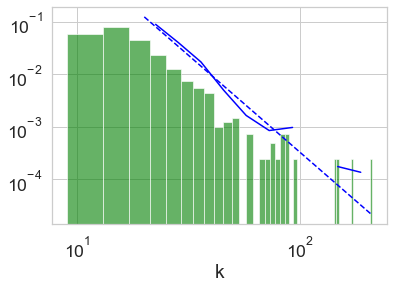

gama=  3.6830367781076028   sigma=  0.1488281027295794


C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_18120/216160569.py:522: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


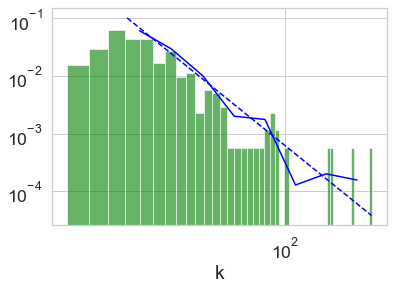

gama=  4.236500654139152   sigma=  0.18293783301542824


In [42]:
plot_degree_dist_power_law(G4000,10)
plot_degree_dist_power_law(G40001sg,10)
plot_degree_dist_power_law(G40002sg,20)
plot_degree_dist_power_law(G40003sg,30)

C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_18120/216160569.py:522: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


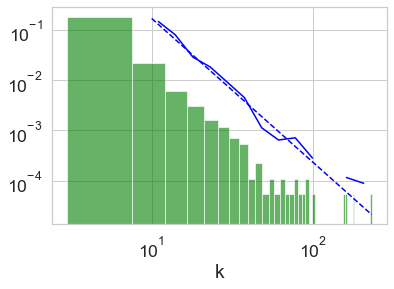

gama=  2.867471854536187   sigma=  0.08882657779016012


C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_18120/216160569.py:522: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


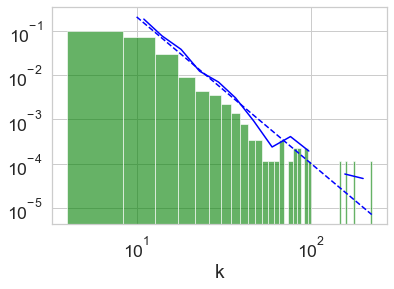

gama=  3.3043813363605214   sigma=  0.07672750573796974


C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_18120/216160569.py:522: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


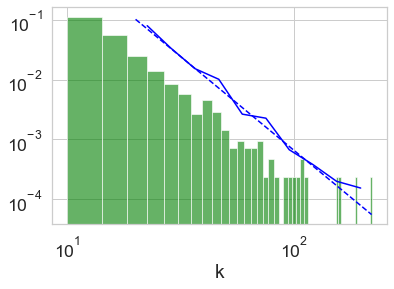

gama=  3.135621016643206   sigma=  0.12996975612195552


C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_18120/216160569.py:522: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


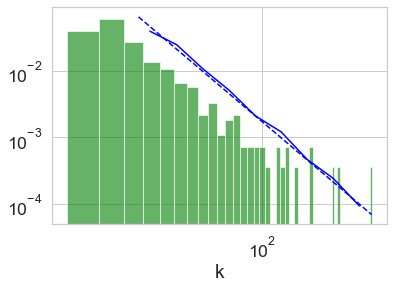

gama=  3.0243711515003175   sigma=  0.15759708040340437


In [43]:
plot_degree_dist_power_law(G4000,10)
plot_degree_dist_power_law(G40001sl,10)
plot_degree_dist_power_law(G40002sl,20)
plot_degree_dist_power_law(G40003sl,30)

/tmp/ipykernel_3547/1487185416.py:505: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


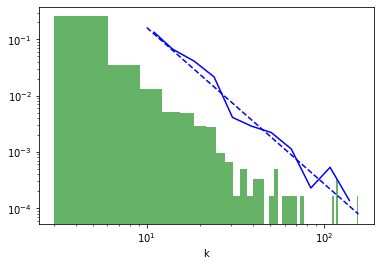

gama=  2.7736027539629715   sigma=  0.12268266780688904


/tmp/ipykernel_3547/1487185416.py:505: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


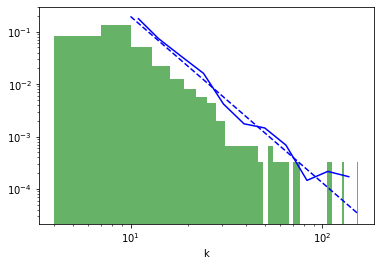

gama=  3.1748679140742433   sigma=  0.11743182928682122


/tmp/ipykernel_3547/1487185416.py:505: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


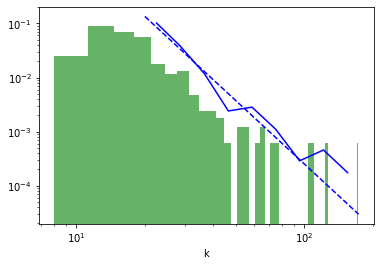

gama=  3.9023946308495376   sigma=  0.23619352533847335


/tmp/ipykernel_3547/1487185416.py:505: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


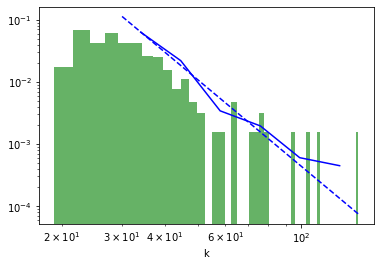

gama=  4.615571580139555   sigma=  0.31957439777275504


In [5]:
plot_degree_dist_power_law(G2000,10)
plot_degree_dist_power_law(G20001sg,10)
plot_degree_dist_power_law(G20002sg,20)
plot_degree_dist_power_law(G20003sg,30)

C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_13140/1647707018.py:522: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


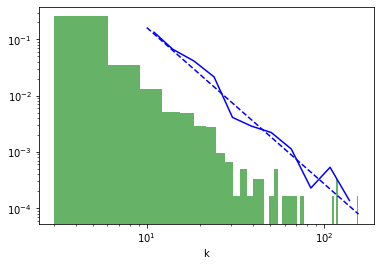

gama=  2.7736027539629715   sigma=  0.12268266780688904


C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_13140/1647707018.py:522: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


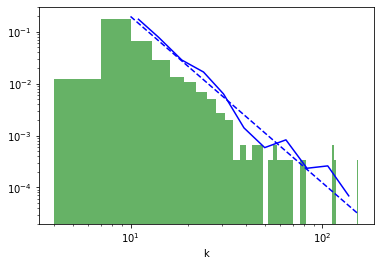

gama=  3.209060995538301   sigma=  0.10690395437671432


C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_13140/1647707018.py:522: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


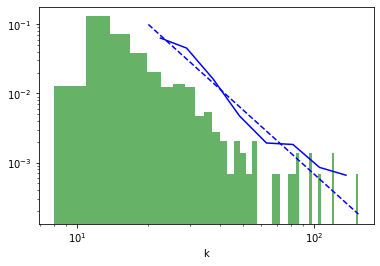

gama=  3.0907949087490048   sigma=  0.1833748441444623


C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_13140/1647707018.py:522: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


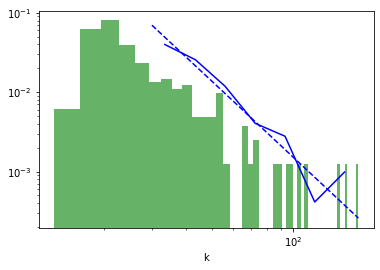

gama=  3.1743254250734365   sigma=  0.2461938743567338


In [83]:
plot_degree_dist_power_law(G2000,10)
plot_degree_dist_power_law(G20001sl,10)
plot_degree_dist_power_law(G20002sl,20)
plot_degree_dist_power_law(G20003sl,30)

In [16]:
print('nu_teo_4000_noaprox=',calculate_nu_analitic( 1.00683,2.87))
print('nu_teo_2000_noaprox=',calculate_nu_analitic( 1.007,2.77))

nu_teo_4000_noaprox= 0.9888137934371797
nu_teo_2000_noaprox= 0.9889029320727156


In [78]:
print(calculate_nu_analitic( 1.7,1.88))



1.3015746696693609


In [15]:
G_air_full=nx.read_edgelist('openflights.txt')


TypeError: Failed to convert edge data (['1']) to dictionary.

In [85]:
AA_0s=np.loadtxt('openflights_GC_adj_matrix_0.txt')
AA_1sg=np.loadtxt('openflights_GC_adj_matrix_1.txt')
AA_2sg=np.loadtxt('openflights_GC_adj_matrix_2.txt')
AA_3sg=np.loadtxt('openflights_GC_adj_matrix_3.txt')
AA_4sg=np.loadtxt('openflights_GC_adj_matrix_4.txt')
AA_5sg=np.loadtxt('openflights_GC_adj_matrix_5.txt')

In [86]:
G=nx.from_numpy_matrix(AA_0s)
Gcc=sorted(nx.connected_components(G))
G_0A=G.subgraph(Gcc[1])
print(G_0A.number_of_nodes())
G_0A=nx.convert_node_labels_to_integers(G_0A)
G_1Ag=nx.from_numpy_matrix(AA_1sg)
print(G_1Ag.number_of_nodes())
G_2Ag=nx.from_numpy_matrix(AA_2sg)
G_3Ag=nx.from_numpy_matrix(AA_3sg)
G_4Ag=nx.from_numpy_matrix(AA_4sg)
G_5Ag=nx.from_numpy_matrix(AA_5sg)

2905
1453


C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_13140/1647707018.py:522: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


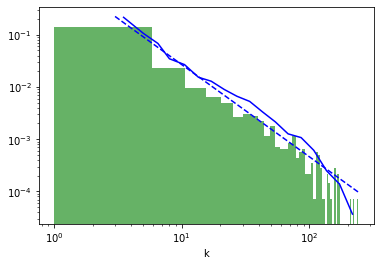

gama=  1.7650783800561887   sigma=  0.018944316862945464


C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_13140/1647707018.py:522: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


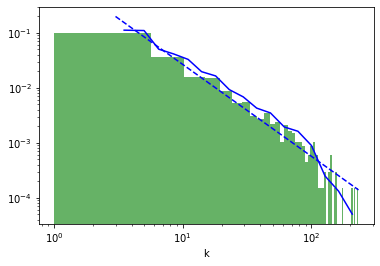

gama=  1.6717839799386671   sigma=  0.019665011964045326


C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_13140/1647707018.py:522: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


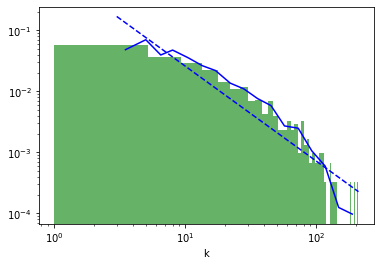

gama=  1.5580648986640364   sigma=  0.021338144712401766


C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_13140/1647707018.py:522: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


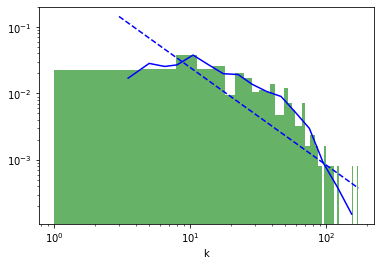

gama=  1.4687962264994197   sigma=  0.02495150548576048


C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_13140/1647707018.py:522: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


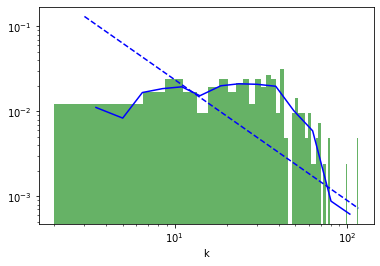

gama=  1.422986171563793   sigma=  0.031527527771967656


C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_13140/1647707018.py:522: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


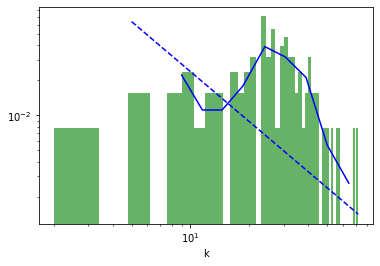

gama=  1.4268793431933942   sigma=  0.04499703368559403


In [87]:
plot_degree_dist_power_law(G_0A,3)
plot_degree_dist_power_law(G_1Ag,3)
plot_degree_dist_power_law(G_2Ag,3)
plot_degree_dist_power_law(G_3Ag,3)
plot_degree_dist_power_law(G_4Ag,3)
plot_degree_dist_power_law(G_5Ag,3)

In [88]:
G_1Al=laplacian_renorm(G_0A,1)
G_2Al=laplacian_renorm(G_0A,2)
G_3Al=laplacian_renorm(G_0A,3)
G_4Al=laplacian_renorm(G_0A,4)
G_5Al=laplacian_renorm(G_0A,5)





[[2131, 2103], [2143, 2108], [2539, 2498], [2742, 2668], [2899, 820], [2340, 2271], [2339, 819], [2867, 2158], [2805, 2733], [1775, 1492], [2807, 2736], [2540, 2488], [2188, 394], [1871, 514], [2731, 2730], [2814, 2775], [2810, 1587], [2780, 2779], [2802, 2705], [2804, 2735], [2739, 2345], [2184, 2182], [2811, 2737], [2808, 2738], [94, 82], [2075, 2073], [110, 75], [2537, 1515], [2744, 2669], [2241, 1651], [2079, 2077], [2350, 2056], [2710, 2709], [2313, 2311], [2809, 2346], [2782, 1624], [2778, 2777], [2783, 2776], [2784, 2781], [1649, 1590], [2812, 2740], [2631, 2038], [2518, 2517], [2750, 2632], [2293, 2291], [442, 441], [2117, 2110], [2839, 2835], [2652, 1222], [2098, 1206], [2830, 2387], [2824, 114], [2180, 481], [2688, 2686], [495, 494], [788, 776], [798, 783], [680, 678], [1413, 1410], [491, 487], [2251, 2236], [2727, 2726], [2179, 336], [2176, 2174], [327, 319], [337, 330], [329, 328], [1794, 1442], [2803, 2768], [2635, 1583], [2095, 2094], [2796, 2793], [992, 990], [2114, 67

1453


[[2131, 2103], [2143, 2108], [2539, 2498], [2742, 2668], [2899, 820], [2340, 2271], [2339, 819], [2867, 2158], [2805, 2733], [1775, 1492], [2807, 2736], [2540, 2488], [2188, 394], [1871, 514], [2731, 2730], [2814, 2775], [2810, 1587], [2780, 2779], [2802, 2705], [2804, 2735], [2739, 2345], [2184, 2182], [2811, 2737], [2808, 2738], [94, 82], [2075, 2073], [110, 75], [2537, 1515], [2744, 2669], [2241, 1651], [2079, 2077], [2350, 2056], [2710, 2709], [2313, 2311], [2809, 2346], [2782, 1624], [2778, 2777], [2783, 2776], [2784, 2781], [1649, 1590], [2812, 2740], [2631, 2038], [2518, 2517], [2750, 2632], [2293, 2291], [442, 441], [2117, 2110], [2839, 2835], [2652, 1222], [2098, 1206], [2830, 2387], [2824, 114], [2180, 481], [2688, 2686], [495, 494], [788, 776], [798, 783], [680, 678], [1413, 1410], [491, 487], [2251, 2236], [2727, 2726], [2179, 336], [2176, 2174], [327, 319], [337, 330], [329, 328], [1794, 1442], [2803, 2768], [2635, 1583], [2095, 2094], [2796, 2793], [992, 990], [211

1453


[[1447, 1018], [1360, 1233], [872, 863], [989, 985], [1372, 856], [1365, 1364], [984, 983], [1363, 1362], [1343, 1341], [1342, 1340], [1361, 610], [1357, 1315], [1358, 1355], [1383, 846], [660, 659], [170, 169], [1359, 1322], [1167, 1165], [1349, 1348], [1330, 1166], [1356, 1336], [1345, 1344], [1237, 1235], [996, 995], [908, 904], [1319, 1318], [1317, 1316], [775, 16], [875, 874], [1351, 1350], [837, 836], [834, 833], [906, 905], [1289, 1019], [1156, 1154], [1439, 1437], [395, 394], [838, 20], [835, 831], [1326, 1320], [1313, 939], [894, 889], [1354, 1236], [1131, 1127], [1409, 1287], [1353, 1352], [1258, 818], [1338, 1335], [1347, 1346], [866, 843], [1404, 1264], [1274, 844], [38, 2], [1401, 1399], [1, 0], [842, 840], [1262, 988], [1324, 1321], [1125, 1123], [1150, 1149], [1062, 1050], [1058, 482], [1265, 307], [855, 852], [35, 14], [870, 851], [1433, 1105], [361, 359], [871, 858], [978, 977], [171, 168], [1367, 1022], [880, 46], [900, 108], [893, 806], [1334, 1331], [1369, 13

727


[[2131, 2103], [2143, 2108], [2539, 2498], [2742, 2668], [2899, 820], [2340, 2271], [2339, 819], [2867, 2158], [2805, 2733], [1775, 1492], [2807, 2736], [2540, 2488], [2188, 394], [1871, 514], [2731, 2730], [2814, 2775], [2810, 1587], [2780, 2779], [2802, 2705], [2804, 2735], [2739, 2345], [2184, 2182], [2811, 2737], [2808, 2738], [94, 82], [2075, 2073], [110, 75], [2537, 1515], [2744, 2669], [2241, 1651], [2079, 2077], [2350, 2056], [2710, 2709], [2313, 2311], [2809, 2346], [2782, 1624], [2778, 2777], [2783, 2776], [2784, 2781], [1649, 1590], [2812, 2740], [2631, 2038], [2518, 2517], [2750, 2632], [2293, 2291], [442, 441], [2117, 2110], [2839, 2835], [2652, 1222], [2098, 1206], [2830, 2387], [2824, 114], [2180, 481], [2688, 2686], [495, 494], [788, 776], [798, 783], [680, 678], [1413, 1410], [491, 487], [2251, 2236], [2727, 2726], [2179, 336], [2176, 2174], [327, 319], [337, 330], [329, 328], [1794, 1442], [2803, 2768], [2635, 1583], [2095, 2094], [2796, 2793], [992, 990], [2114

1453


[[1447, 1018], [1360, 1233], [872, 863], [989, 985], [1372, 856], [1365, 1364], [984, 983], [1363, 1362], [1343, 1341], [1342, 1340], [1361, 610], [1357, 1315], [1358, 1355], [1383, 846], [660, 659], [170, 169], [1359, 1322], [1167, 1165], [1349, 1348], [1330, 1166], [1356, 1336], [1345, 1344], [1237, 1235], [996, 995], [908, 904], [1319, 1318], [1317, 1316], [775, 16], [875, 874], [1351, 1350], [837, 836], [834, 833], [906, 905], [1289, 1019], [1156, 1154], [1439, 1437], [395, 394], [838, 20], [835, 831], [1326, 1320], [1313, 939], [894, 889], [1354, 1236], [1131, 1127], [1409, 1287], [1353, 1352], [1258, 818], [1338, 1335], [1347, 1346], [866, 843], [1404, 1264], [1274, 844], [38, 2], [1401, 1399], [1, 0], [842, 840], [1262, 988], [1324, 1321], [1125, 1123], [1150, 1149], [1062, 1050], [1058, 482], [1265, 307], [855, 852], [35, 14], [870, 851], [1433, 1105], [361, 359], [871, 858], [978, 977], [171, 168], [1367, 1022], [880, 46], [900, 108], [893, 806], [1334, 1331], [1369, 13

727


[[646, 643], [645, 642], [634, 633], [712, 572], [640, 637], [721, 597], [639, 638], [336, 335], [315, 314], [636, 635], [641, 631], [644, 621], [620, 619], [350, 301], [329, 317], [261, 260], [683, 360], [313, 0], [623, 622], [316, 284], [124, 123], [627, 520], [333, 9], [432, 310], [654, 337], [651, 629], [649, 630], [330, 327], [652, 650], [332, 323], [416, 413], [434, 311], [285, 10], [331, 2], [713, 455], [725, 410], [364, 363], [340, 12], [351, 303], [726, 681], [592, 589], [322, 4], [494, 191], [411, 248], [246, 146], [454, 160], [145, 143], [144, 142], [576, 414], [326, 321], [603, 433], [542, 483], [555, 328], [513, 505], [443, 277], [657, 586], [703, 678], [653, 553], [567, 421], [647, 632], [220, 193], [379, 378], [715, 312], [451, 155], [452, 318], [714, 711], [655, 556], [457, 149], [648, 554], [445, 435], [516, 509], [501, 224], [417, 415], [34, 33], [362, 35], [349, 174], [705, 671], [446, 444], [661, 660], [690, 470], [602, 14], [162, 161], [584, 192], [450, 154],

1453


[[1447, 1018], [1360, 1233], [872, 863], [989, 985], [1372, 856], [1365, 1364], [984, 983], [1363, 1362], [1343, 1341], [1342, 1340], [1361, 610], [1357, 1315], [1358, 1355], [1383, 846], [660, 659], [170, 169], [1359, 1322], [1167, 1165], [1349, 1348], [1330, 1166], [1356, 1336], [1345, 1344], [1237, 1235], [996, 995], [908, 904], [1319, 1318], [1317, 1316], [775, 16], [875, 874], [1351, 1350], [837, 836], [834, 833], [906, 905], [1289, 1019], [1156, 1154], [1439, 1437], [395, 394], [838, 20], [835, 831], [1326, 1320], [1313, 939], [894, 889], [1354, 1236], [1131, 1127], [1409, 1287], [1353, 1352], [1258, 818], [1338, 1335], [1347, 1346], [866, 843], [1404, 1264], [1274, 844], [38, 2], [1401, 1399], [1, 0], [842, 840], [1262, 988], [1324, 1321], [1125, 1123], [1150, 1149], [1062, 1050], [1058, 482], [1265, 307], [855, 852], [35, 14], [870, 851], [1433, 1105], [361, 359], [871, 858], [978, 977], [171, 168], [1367, 1022], [880, 46], [900, 108], [893, 806], [1334, 1331], [1369, 13

727


[[646, 643], [645, 642], [634, 633], [712, 572], [640, 637], [721, 597], [639, 638], [336, 335], [315, 314], [636, 635], [641, 631], [644, 621], [620, 619], [350, 301], [329, 317], [261, 260], [683, 360], [313, 0], [623, 622], [316, 284], [124, 123], [627, 520], [333, 9], [432, 310], [654, 337], [651, 629], [649, 630], [330, 327], [652, 650], [332, 323], [416, 413], [434, 311], [285, 10], [331, 2], [713, 455], [725, 410], [364, 363], [340, 12], [351, 303], [726, 681], [592, 589], [322, 4], [494, 191], [411, 248], [246, 146], [454, 160], [145, 143], [144, 142], [576, 414], [326, 321], [603, 433], [542, 483], [555, 328], [513, 505], [443, 277], [657, 586], [703, 678], [653, 553], [567, 421], [647, 632], [220, 193], [379, 378], [715, 312], [451, 155], [452, 318], [714, 711], [655, 556], [457, 149], [648, 554], [445, 435], [516, 509], [501, 224], [417, 415], [34, 33], [362, 35], [349, 174], [705, 671], [446, 444], [661, 660], [690, 470], [602, 14], [162, 161], [584, 192], [450, 154],

1453


[[1447, 1018], [1360, 1233], [872, 863], [989, 985], [1372, 856], [1365, 1364], [984, 983], [1363, 1362], [1343, 1341], [1342, 1340], [1361, 610], [1357, 1315], [1358, 1355], [1383, 846], [660, 659], [170, 169], [1359, 1322], [1167, 1165], [1349, 1348], [1330, 1166], [1356, 1336], [1345, 1344], [1237, 1235], [996, 995], [908, 904], [1319, 1318], [1317, 1316], [775, 16], [875, 874], [1351, 1350], [837, 836], [834, 833], [906, 905], [1289, 1019], [1156, 1154], [1439, 1437], [395, 394], [838, 20], [835, 831], [1326, 1320], [1313, 939], [894, 889], [1354, 1236], [1131, 1127], [1409, 1287], [1353, 1352], [1258, 818], [1338, 1335], [1347, 1346], [866, 843], [1404, 1264], [1274, 844], [38, 2], [1401, 1399], [1, 0], [842, 840], [1262, 988], [1324, 1321], [1125, 1123], [1150, 1149], [1062, 1050], [1058, 482], [1265, 307], [855, 852], [35, 14], [870, 851], [1433, 1105], [361, 359], [871, 858], [978, 977], [171, 168], [1367, 1022], [880, 46], [900, 108], [893, 806], [1334, 1331], [1369, 13

727


[[646, 643], [645, 642], [634, 633], [712, 572], [640, 637], [721, 597], [639, 638], [336, 335], [315, 314], [636, 635], [641, 631], [644, 621], [620, 619], [350, 301], [329, 317], [261, 260], [683, 360], [313, 0], [623, 622], [316, 284], [124, 123], [627, 520], [333, 9], [432, 310], [654, 337], [651, 629], [649, 630], [330, 327], [652, 650], [332, 323], [416, 413], [434, 311], [285, 10], [331, 2], [713, 455], [725, 410], [364, 363], [340, 12], [351, 303], [726, 681], [592, 589], [322, 4], [494, 191], [411, 248], [246, 146], [454, 160], [145, 143], [144, 142], [576, 414], [326, 321], [603, 433], [542, 483], [555, 328], [513, 505], [443, 277], [657, 586], [703, 678], [653, 553], [567, 421], [647, 632], [220, 193], [379, 378], [715, 312], [451, 155], [452, 318], [714, 711], [655, 556], [457, 149], [648, 554], [445, 435], [516, 509], [501, 224], [417, 415], [34, 33], [362, 35], [349, 174], [705, 671], [446, 444], [661, 660], [690, 470], [602, 14], [162, 161], [584, 192], [450, 154],

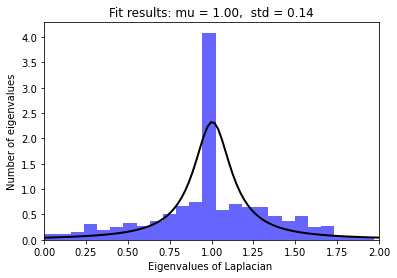

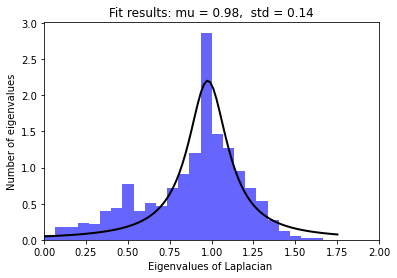

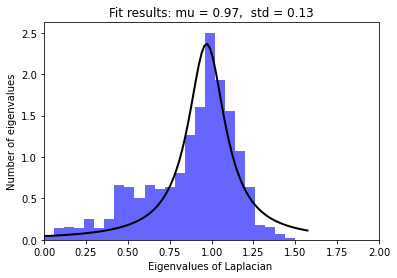

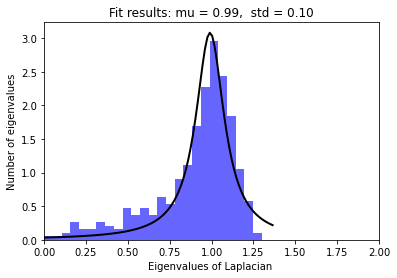

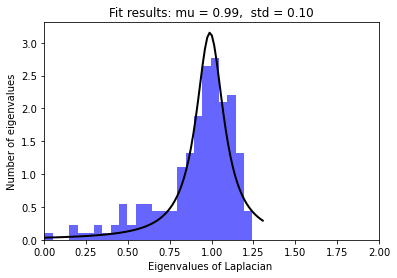

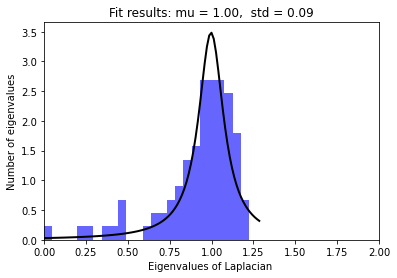

In [90]:
laplacian_distrubution_cauchy(G_0A,10)
laplacian_distrubution_cauchy(G_1Al,10)
laplacian_distrubution_cauchy(G_2Al,10)
laplacian_distrubution_cauchy(G_3Al,10)
laplacian_distrubution_cauchy(G_4Al,10)
laplacian_distrubution_cauchy(G_5Al,10)


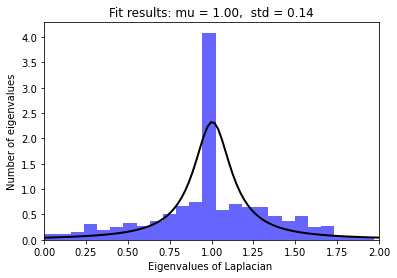

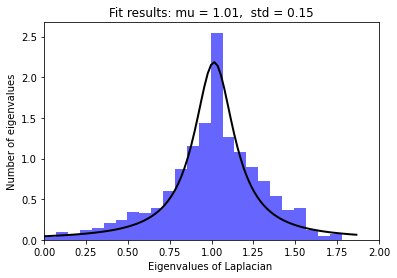

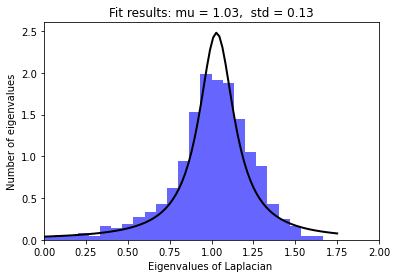

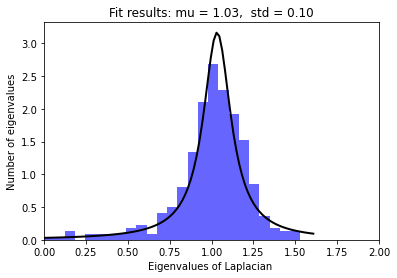

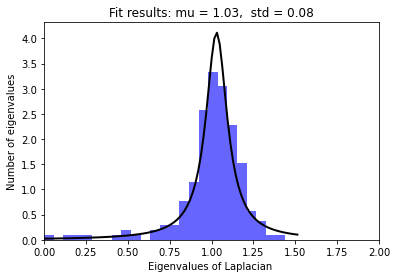

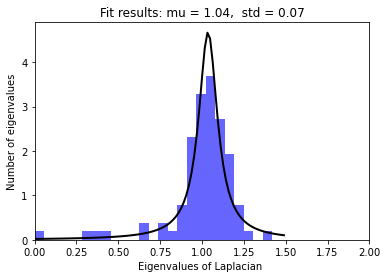

In [14]:
laplacian_distrubution_cauchy(G_0A,10)
laplacian_distrubution_cauchy(G_1Ag,10)
laplacian_distrubution_cauchy(G_2Ag,10)
laplacian_distrubution_cauchy(G_3Ag,10)
laplacian_distrubution_cauchy(G_4Ag,10)
laplacian_distrubution_cauchy(G_5Ag,10)

C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_13140/1647707018.py:560: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


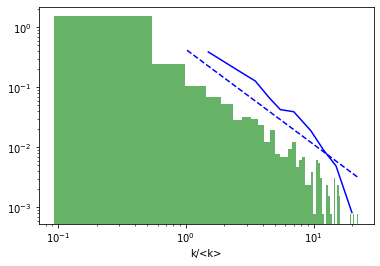

gama=  1.5826842377043213   sigma=  0.023534394699694768


C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_13140/1647707018.py:560: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


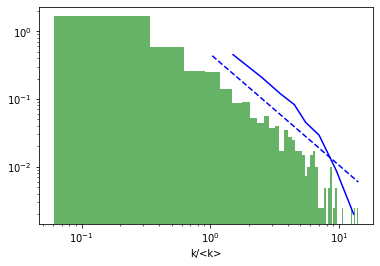

gama=  1.6426260746202548   sigma=  0.03309692669192257


C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_13140/1647707018.py:560: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


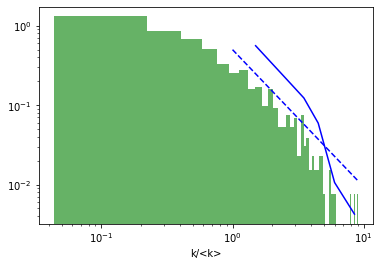

gama=  1.7275507203842277   sigma=  0.04735951798506825


C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_13140/1647707018.py:560: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


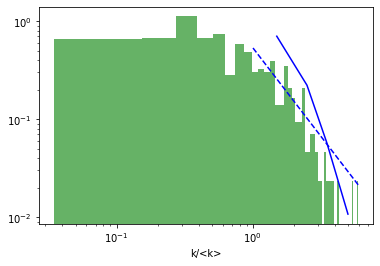

gama=  1.8071877693358454   sigma=  0.06821981776190102


C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_13140/1647707018.py:560: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)


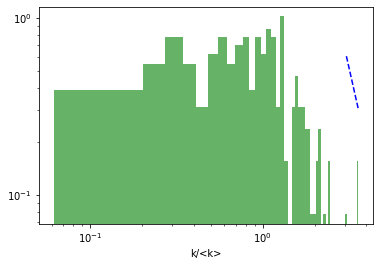

gama=  4.314834621363807   sigma=  1.9138206609634851


C:\Users\COSTEL~1\AppData\Local\Temp/ipykernel_13140/1647707018.py:560: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)
C:\Users\Costelinha\anaconda3\lib\site-packages\powerlaw.py:1156: RuntimeWarning: invalid value encountered in double_scalars
  self.alpha = 1 + (self.n / sum(log(data / (self.xmin - .5))))
C:\Users\Costelinha\anaconda3\lib\site-packages\powerlaw.py:1170: RuntimeWarning: invalid value encountered in double_scalars
  return 1 + len(data)/sum(log(data / (self.xmin)))
Not enough data. Returning nan
Not enough data. Returning nan
Not enough data. Returning nan
Not enough data. Returning nan


ValueError: max() arg is an empty sequence

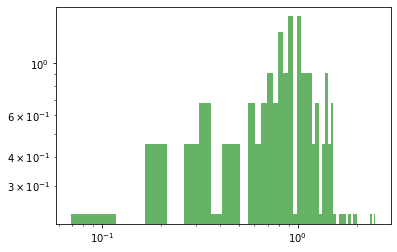

In [91]:
plot_degree_dist_power_law2(G_0A,1)
plot_degree_dist_power_law2(G_1Ag,1)
plot_degree_dist_power_law2(G_2Ag,1)
plot_degree_dist_power_law2(G_3Ag,1)
plot_degree_dist_power_law2(G_4Ag,3)
plot_degree_dist_power_law2(G_5Ag,3)

In [8]:
print(calculate_nu_analitic(1.81,1.76))

1.8618564029827942


In [10]:
print(calculate_nu(G_0A,G_1Ag))
print(calculate_nu(G_1Ag,G_2Ag))
print(calculate_nu(G_2Ag,G_3Ag))
print(calculate_nu(G_3Ag,G_4Ag))
print(calculate_nu(G_4Ag,G_5Ag))


0.6097254623537787
0.48396817095734246
0.3297185632718355
0.1637534920997773
-0.16210814498258164


In [92]:
print(calculate_nu(G_0A,G_1Al))
print(calculate_nu(G_1Al,G_2Al))
print(calculate_nu(G_2Al,G_3Al))
print(calculate_nu(G_3Al,G_4Al))
print(calculate_nu(G_4Al,G_5Al))

0.74820618748084
0.3418571526369518
0.08614141328949942
-0.13081037888409772
-0.16849941334124577


In [9]:
print(2/(1.76-1)-1)

1.6315789473684212


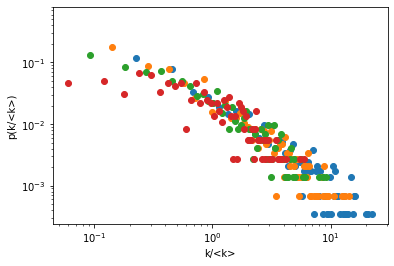

In [11]:
plot_all_dist(G_0A)
plot_all_dist(G_1Ag)
plot_all_dist(G_2Ag)
plot_all_dist(G_3Ag)
#plot_all_dist(G_4Ag)
#plot_all_dist(G_5Ag)
plt.show()

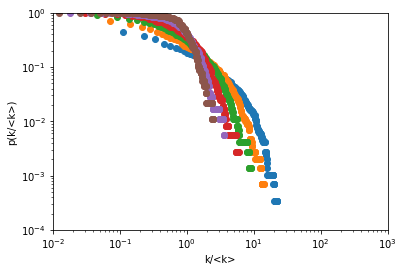

In [12]:
plot_cdf(G_0A)
plot_cdf(G_1Ag)
plot_cdf(G_2Ag)
plot_cdf(G_3Ag)
plot_cdf(G_4Ag)
plot_cdf(G_5Ag)
plt.show()

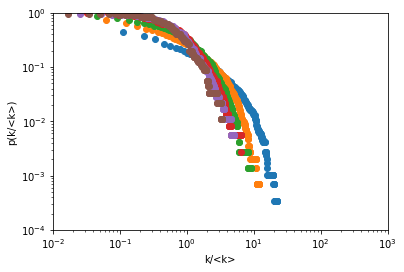

In [93]:
plot_cdf(G_0A)
plot_cdf(G_1Al)
plot_cdf(G_2Al)
plot_cdf(G_3Al)
plot_cdf(G_4Al)
plot_cdf(G_5Al)
plt.show()

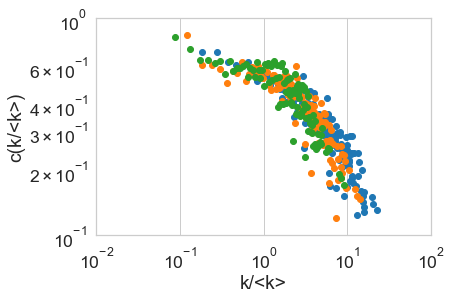

In [16]:
clustering_per_kl(G_0A)
clustering_per_kl(G_1Ag)
clustering_per_kl(G_2Ag)
#clustering_per_kl(G_3Ag)
#clustering_per_kl(G_4Ag)
#clustering_per_kl(G_5Ag)


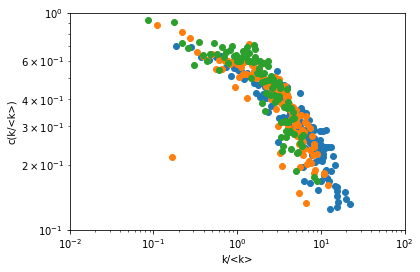

In [94]:
clustering_per_kl(G_0A)
clustering_per_kl(G_1Al)
clustering_per_kl(G_2Al)
#clustering_per_kl(G_3Ag)
#clustering_per_kl(G_4Ag)
#clustering_per_kl(G_5Ag)

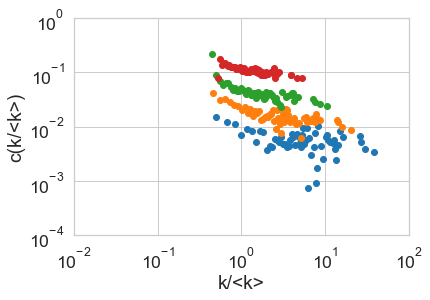

In [48]:
clustering_per_kl(G4000)
clustering_per_kl(G40001sg)
clustering_per_kl(G40002sg)
clustering_per_kl(G40003sg)
#clustering_per_kl(G_3Ag)
#clustering_per_kl(G_4Ag)
#clustering_per_kl(G_5Ag)


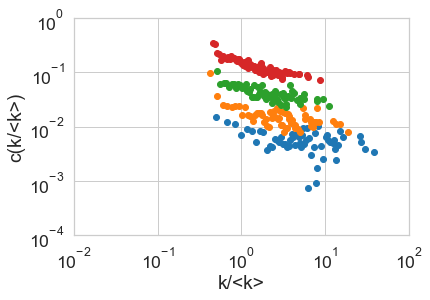

In [49]:
clustering_per_kl(G4000)
clustering_per_kl(G40001sl)
clustering_per_kl(G40002sl)
clustering_per_kl(G40003sl)


coef linear= 2.571794671094698
coef angular= [0.20571275]
nu= 0.29678112494639136


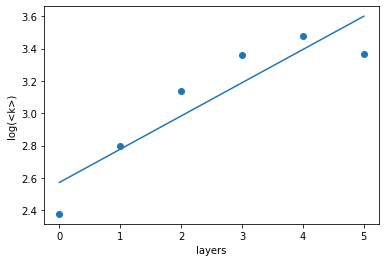

In [76]:
plot_nu_regression(G_0A,G_1Ag,G_2Ag,G_3Ag,G_4Ag,G_5Ag)
print('nu=',0.205713/np.log(2))

coef linear= 2.6146641262479102
coef angular= [0.36666398]
nu= 0.5289785636923473


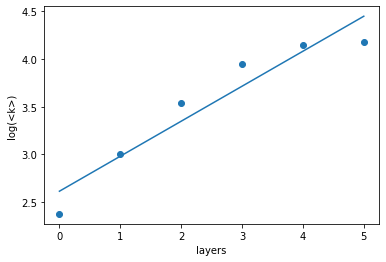

In [77]:
plot_nu_regression(G_0A,G_1Al,G_2Al,G_3Al,G_4Al,G_5Al)
print('nu=',0.36666/np.log(2))

coef linear= 2.391393219371299
coef angular= [0.37904533]
nu= 0.5468468178631206


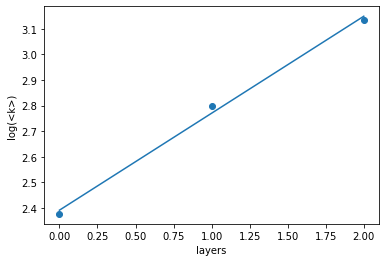

In [20]:
plot_nu_regression2(G_0A,G_1Ag,G_2Ag)
print('nu=',0.37904533/np.log(2))

coef linear= 2.394318073323638
coef angular= [0.57861648]
nu= 0.8347671262726281


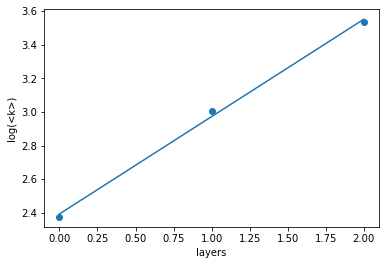

In [22]:
plot_nu_regression2(G_0A,G_1Al,G_2Al)
print('nu=',0.57861648/np.log(2))

(295, 295)
(295, 295)


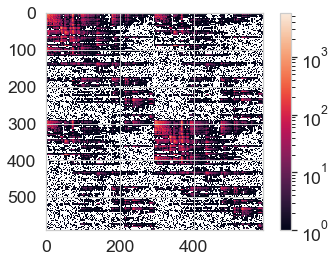

In [50]:
with open('stat_data_hm_w_295_T20_right.pkl', 'rb') as f:
    datar = pickle.load(f,encoding='bytes')

with open('stat_data_hm_w_295_T20_left.pkl', 'rb') as x:
    datal = pickle.load(x,encoding='bytes')

dictAr=datar[0]

dictAl=datal[0]

listAr=list( dictAr.values())
listAl=list(dictAl.values())


Ar=np.array(listAr[0])
Al=np.array(listAl[0])

print(Ar.shape)
print(Al.shape)

A=np.zeros([590,590])

for i in range(590):
    for j in range (590):
        if i<295 and j<295:
            A[i,j]=Ar[i,j]
            
        if i>=295 and j>=295:
            A[i,j]=Ar[i-295,j-295]
        if i>=295 and j<295:
            A[i,j]=Al[i-295,j]
        if i<295 and j>=295:
            A[i,j]= Al[i,j-295]



for i in range(590):
  for  j in range(590):
      if A[i,j]<=0:
          A[i,j]=0
plt.imshow(A,norm=LogNorm())
plt.colorbar()
plt.show()        

G_mouse=nx.from_numpy_matrix(A)


In [51]:
G_mouse1sl=laplacian_renorm(G_mouse,1)
G_mouse2sl=laplacian_renorm(G_mouse,2)
G_mouse3sl=laplacian_renorm(G_mouse,3)


295
295
295
295
147
148
295
295
147
148
74
74


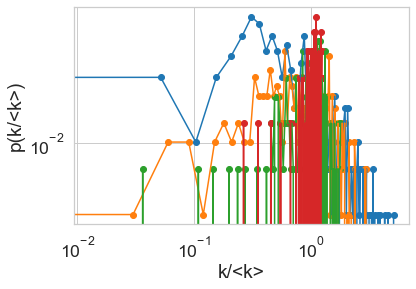

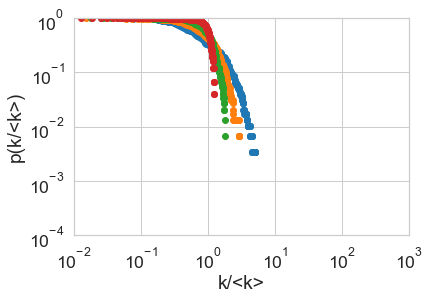

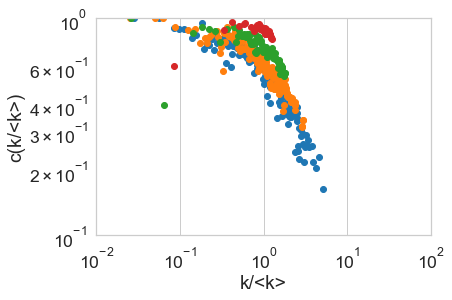

In [54]:
plot_all_dist(G_mouse)
plot_all_dist(G_mouse1sl)
plot_all_dist(G_mouse2sl)
plot_all_dist(G_mouse3sl)
plt.show()


plot_cdf(G_mouse)
plot_cdf(G_mouse1sl)
plot_cdf(G_mouse2sl)
plot_cdf(G_mouse3sl)
plt.show()

clustering_per_kl(G_mouse)
clustering_per_kl(G_mouse1sl)
clustering_per_kl(G_mouse2sl)
clustering_per_kl(G_mouse3sl)

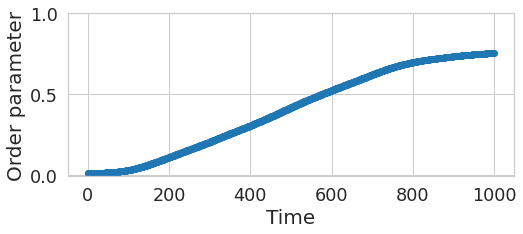

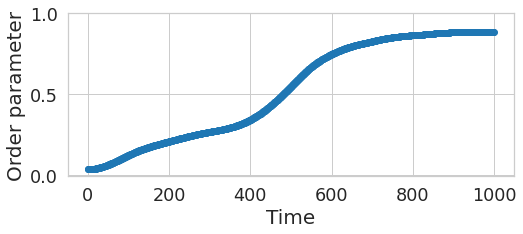

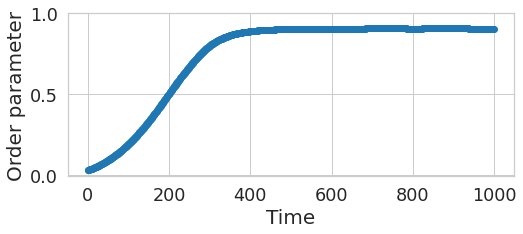

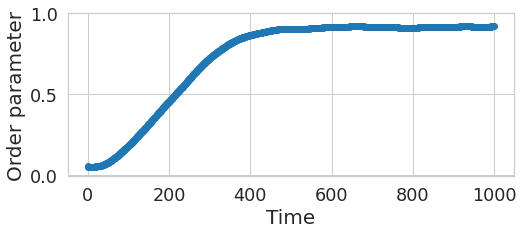

In [15]:
plot_opxt(G2000)
plot_opxt(G20001sl)
plot_opxt(G20002sl)
plot_opxt(G20003sl)


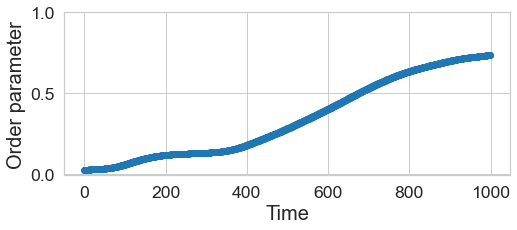

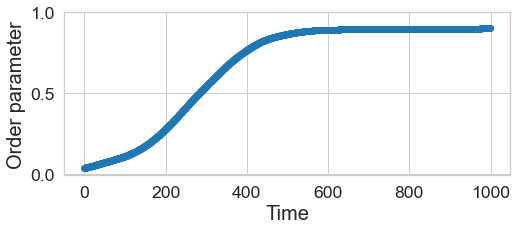

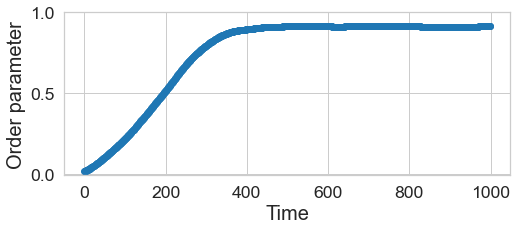

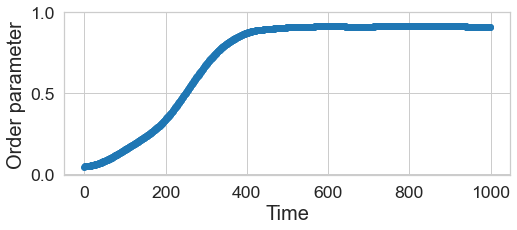

In [9]:
plot_opxt(G2000)
plot_opxt(G20001sg)
plot_opxt(G20002sg)
plot_opxt(G20003sg)

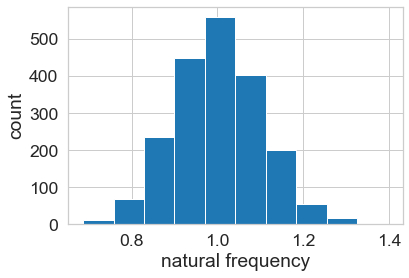

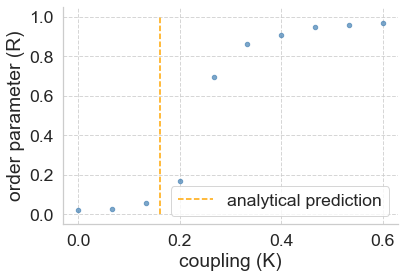

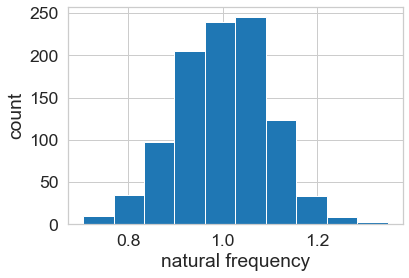

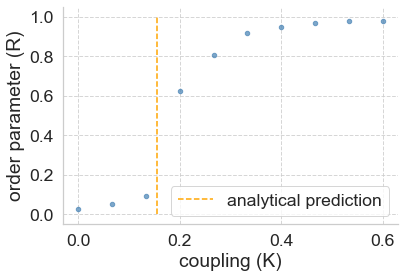

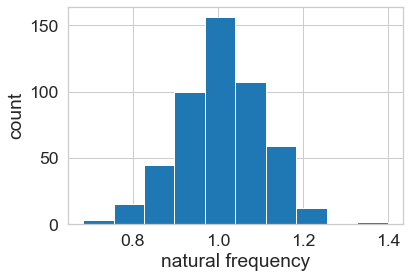

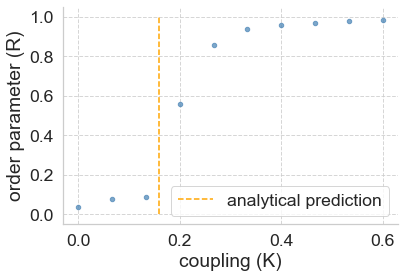

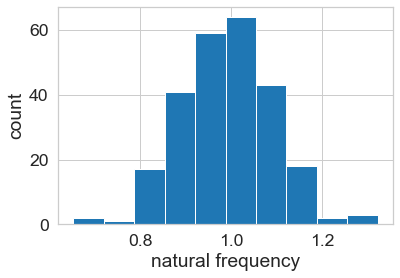

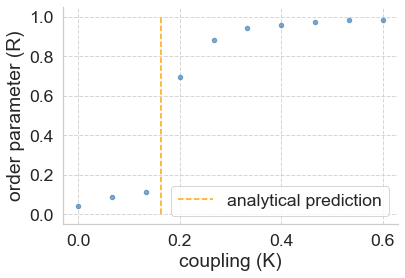

In [21]:
plot_opxk(G2000)
plot_opxk(G20001sl)
plot_opxk(G20002sl)
plot_opxk(G20003sl)

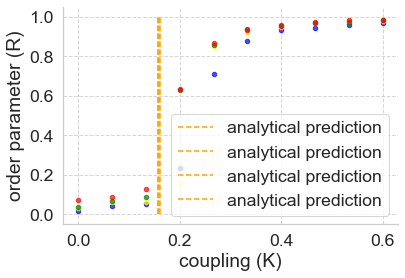

In [10]:
plot_opxk2(G2000,'blue')
plot_opxk2(G20001sl,'yellow')
plot_opxk2(G20002sl,'green')
plot_opxk2(G20003sl,'red')

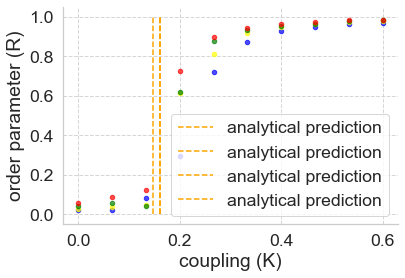

In [15]:
plot_opxk2(G2000,'blue')
plot_opxk2(G20001sg,'yellow')
plot_opxk2(G20002sg,'green')
plot_opxk2(G20003sg,'red')

In [17]:
G=laplacian_replica(G2000,G20001sl,2)
print(Average_degree(G20001sl))
print(Average_degree(G2000))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



11.642


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



11.64


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



11.638


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



11.636


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



11.634


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



11.632


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



11.63


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



11.628


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



11.626


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: 

In [45]:
G400=nx.barabasi_albert_graph(400,3,seed=42 )

In [2]:
G4001sl=laplacian_renorm(G400,1)
G4002sl=laplacian_renorm(G400,2)
G4003sl=laplacian_renorm(G400,3)

NameError: name 'G400' is not defined

In [61]:
print(G400.number_of_edges())

1191


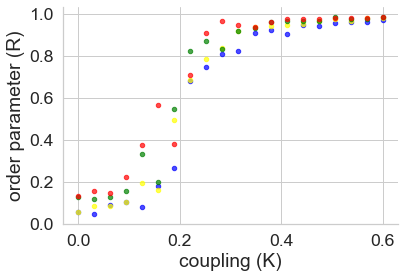

In [18]:
plot_opxk2(G400,'blue')
plot_opxk2(G4001sl,'yellow')
plot_opxk2(G4002sl,'green')
plot_opxk2(G4003sl,'red')

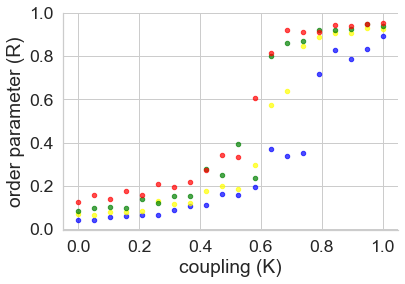

In [12]:
plot_opxk3(G400,'blue')
plot_opxk3(G4001sl,'yellow')
plot_opxk3(G4002sl,'green')
plot_opxk3(G4003sl,'red')

In [2]:
A0sc=np.loadtxt('c_elegans_bin_adj_matrix_0.txt')
A1scg=np.loadtxt("c_elegans_bin_adj_matrix_1.txt")
A2scg=np.loadtxt("c_elegans_bin_adj_matrix_2.txt")
A3scg=np.loadtxt("c_elegans_bin_adj_matrix_3.txt")

In [3]:
G0sc= nx.from_numpy_matrix(A0sc)
G1scg=nx.from_numpy_matrix(A1scg)
G2scg=nx.from_numpy_matrix(A2scg)
G3scg=nx.from_numpy_matrix(A3scg)

In [4]:
G1scl=laplacian_renorm(G0sc,1)
G2scl=laplacian_renorm(G0sc,2)
G3scl=laplacian_renorm(G0sc,3)

139
140
139
140
70
70
139
140
70
70
35
35


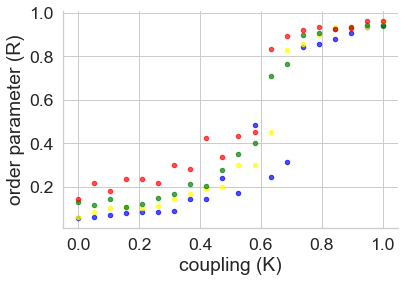

In [6]:
plot_opxk3(G0sc,'blue')
plot_opxk3(G1scl,'yellow')
plot_opxk3(G2scl,'green')
plot_opxk3(G3scl,'red')

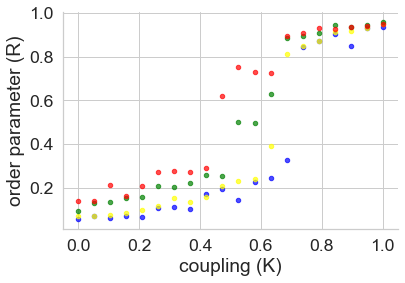

In [7]:
plot_opxk3(G0sc,'blue')
plot_opxk3(G1scg,'yellow')
plot_opxk3(G2scg,'green')
plot_opxk3(G3scg,'red')

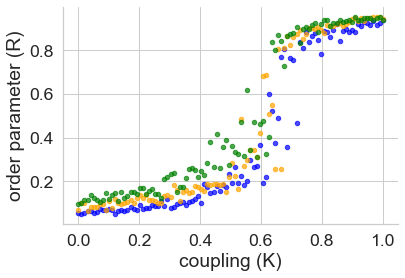

In [21]:
plot_opxk3(G0sc,'blue')
plot_opxk3(G1scl,'orange')
plot_opxk3(G2scl,'green')
#plot_opxk3(G3scl,'red')

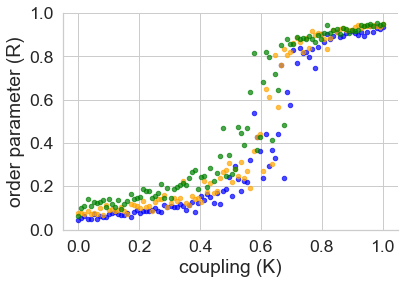

In [22]:
plot_opxk3(G0sc,'blue')
plot_opxk3(G1scg,'orange')
plot_opxk3(G2scg,'green')
#plot_opxk3(G3scg,'red')

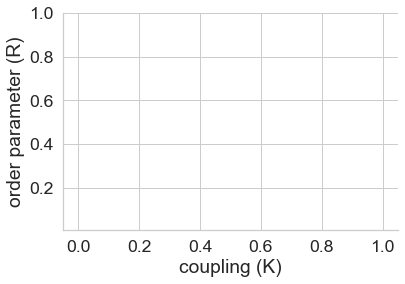

In [19]:
plot_opxk3(G0sc,'blue')
plot_opxk3(G1scl,'yellow')
plot_opxk3(G2scl,'green')
plot_opxk3(G3scl,'red')

In [8]:
plot_opxk3(G0sc,'blue')
plot_opxk3(G1scg,'yellow')
plot_opxk3(G2scg,'green')
plot_opxk3(G3scg,'red')

KeyboardInterrupt: 

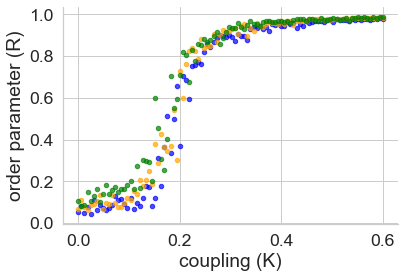

In [16]:
plot_opxk2(G0sc,'blue')
plot_opxk2(G1scl,'orange')
plot_opxk2(G2scl,'green')
#plot_opxk2(G3scl,'red')

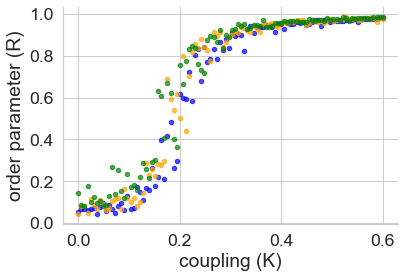

In [17]:
plot_opxk2(G0sc,'blue')
plot_opxk2(G1scg,'orange')
plot_opxk2(G2scg,'green')
#plot_opxk2(G3scg,'red')

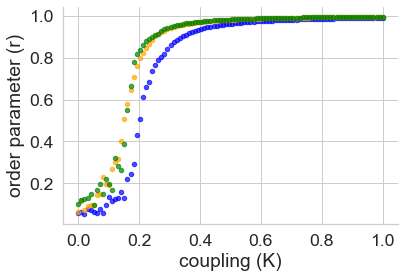

In [5]:
natfreq=np.random.normal(1, 0.1, size=G0sc.number_of_nodes()) 
plot_opxk4(G0sc,'blue',natfreq ,100)
natfreq1=np.random.normal(1, 0.1, size=G1scl.number_of_nodes()) 
plot_opxk4(G1scl,'orange',natfreq1 ,100)
natfreq2=np.random.normal(1, 0.1, size=G2scl.number_of_nodes()) 
plot_opxk4(G2scl,'green',natfreq2 ,100)
#natfreq=np.random.normal(1, 0.1, size=G0sc.number_of_nodes()) 
#plot_opxk4(G3scl,'blue',natfreq ,10)

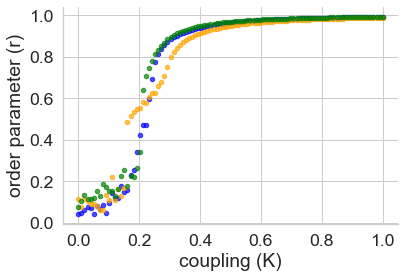

In [6]:
natfreq=np.random.normal(1, 0.1, size=G0sc.number_of_nodes()) 
plot_opxk4(G0sc,'blue',natfreq ,100)
natfreq1=np.random.normal(1, 0.1, size=G1scl.number_of_nodes()) 
plot_opxk4(G1scg,'orange',natfreq1 ,100)
natfreq2=np.random.normal(1, 0.1, size=G2scl.number_of_nodes()) 
plot_opxk4(G2scg,'green',natfreq2 ,100)
#natfreq=np.random.normal(1, 0.1, size=G0sc.number_of_nodes()) 
#plot_opxk4(G3scl,'blue',natfreq ,10)

In [5]:
G0f=nx.complete_graph(G0sc.number_of_nodes())
G1f=nx.complete_graph(G1scl.number_of_nodes())
G2f=nx.complete_graph(G2scl.number_of_nodes())

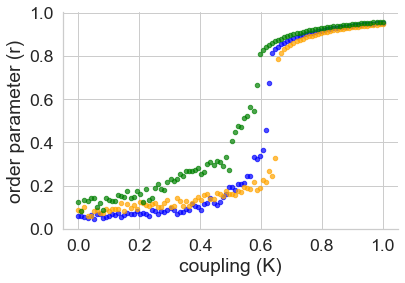

In [6]:
natfreq= np.random.uniform(-1/2,1/2,G0sc.number_of_nodes()) 
plot_opxk4(G0f,'blue',natfreq ,100)
natfreq1=np.random.uniform(-1/2,1/2,G1scl.number_of_nodes())  
plot_opxk4(G1f,'orange',natfreq1 ,100)
natfreq2=np.random.uniform(-1/2,1/2,G2scl.number_of_nodes()) 
plot_opxk4(G2f,'green',natfreq2 ,100)
#natfreq=np.random.normal(1, 0.1, size=G0sc.number_of_nodes()) 
#plot_opxk4(G3scl,'blue',natfreq ,10)

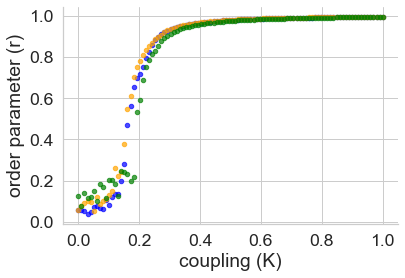

In [7]:
natfreq=np.random.normal(1, 0.1, size=G0sc.number_of_nodes())  
plot_opxk4(G0f,'blue',natfreq ,100)
natfreq1=np.random.normal(1, 0.1, size=G1scl.number_of_nodes())  
plot_opxk4(G1f,'orange',natfreq1 ,100)
natfreq2=np.random.normal(1, 0.1, size=G2scl.number_of_nodes())  
plot_opxk4(G2f,'green',natfreq2 ,100)
#natfreq=np.random.normal(1, 0.1, size=G0sc.number_of_nodes()) 
#plot_opxk4(G3scl,'blue',natfreq ,10)

In [5]:
G1scl_rep=laplacian_replica2(G0sc,G1scl,0.5)
G2scl_rep=laplacian_replica2(G0sc,G2scl,0.5)

In [15]:
print(nx.is_connected(G1scl_rep))
print(nx.is_connected(G2scl_rep))

True
True


In [6]:
print(Average_degree(G0sc))
print('\n')
print(Average_degree(G1scl))
print(Average_degree(G2scl))
print(Average_degree(G3scl))
print('\n')
print(Average_degree(G1scg))
print(Average_degree(G2scg))
print(Average_degree(G3scg))

16.415770609318997


22.97142857142857
23.514285714285716
19.02857142857143


22.52857142857143
24.542857142857144
20.97142857142857


In [7]:
print(Average_degree(G1scl_rep))
print(Average_degree(G2scl_rep))

16.914285714285715
16.914285714285715


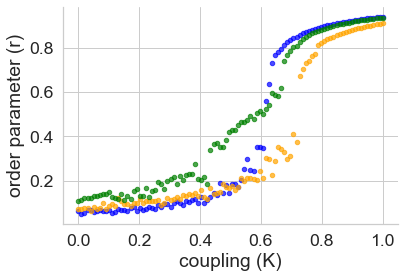

In [8]:
natfreq= np.random.uniform(-1/2,1/2,G0sc.number_of_nodes()) 
plot_opxk4(G0sc,'blue',natfreq ,100)
natfreq1=np.random.uniform(-1/2,1/2,G1scl_rep.number_of_nodes())  
plot_opxk4(G1scl_rep,'orange',natfreq1 ,100)
natfreq2=np.random.uniform(-1/2,1/2,G2scl_rep.number_of_nodes()) 
plot_opxk4(G2scl_rep,'green',natfreq2 ,100)
#natfreq=np.random.normal(1, 0.1, size=G0sc.number_of_nodes()) 
#plot_opxk4(G3scl,'blue',natfreq ,10)

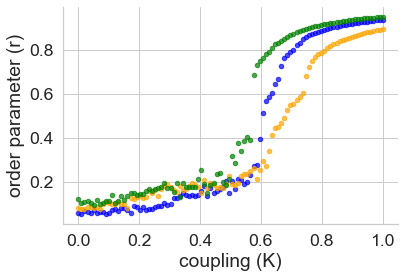

In [9]:
natfreq= np.random.uniform(-1/2,1/2,G0sc.number_of_nodes()) 
plot_opxk4(G0sc,'blue',natfreq ,100)
natfreq1=np.random.normal(1, 0.1, size=G1scl.number_of_nodes()) 
plot_opxk4(G1scl,'orange',natfreq1 ,100)
natfreq2=np.random.uniform(-1/2,1/2,G2scl_rep.number_of_nodes()) 
plot_opxk4(G2scl,'green',natfreq2 ,100)
#natfreq=np.random.normal(1, 0.1, size=G0sc.number_of_nodes()) 
#plot_opxk4(G3scl,'blue',natfreq ,10)

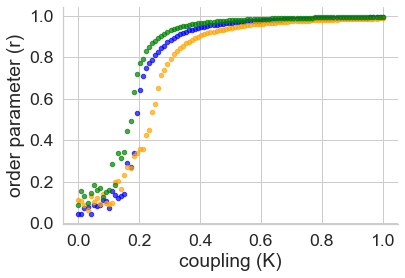

In [11]:
natfreq=np.random.normal(1, 0.1, size=G0sc.number_of_nodes()) 
plot_opxk4(G0sc,'blue',natfreq ,100)
natfreq1=np.random.normal(1, 0.1, size=G1scl.number_of_nodes()) 
plot_opxk4(G1scl_rep,'orange',natfreq1 ,100)
natfreq2=np.random.normal(1, 0.1, size=G2scl.number_of_nodes()) 
plot_opxk4(G2scl_rep,'green',natfreq2 ,100)
#natfreq=np.random.normal(1, 0.1, size=G0sc.number_of_nodes()) 
#plot_opxk4(G3scl,'blue',natfreq ,10)

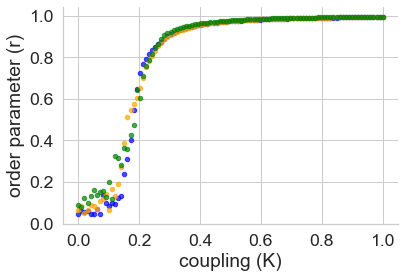

In [12]:
natfreq=np.random.normal(1, 0.1, size=G0sc.number_of_nodes()) 
plot_opxk4(G0sc,'blue',natfreq ,100)
natfreq1=np.random.normal(1, 0.1, size=G1scl.number_of_nodes()) 
plot_opxk4(G1scl,'orange',natfreq1 ,100)
natfreq2=np.random.normal(1, 0.1, size=G2scl.number_of_nodes()) 
plot_opxk4(G2scl,'green',natfreq2 ,100)
#natfreq=np.random.normal(1, 0.1, size=G0sc.number_of_nodes()) 
#plot_opxk4(G3scl,'blue',natfreq ,10)